### Team 39 Contributors:
* 20241457 Onni Mansikkamäki
* 20240506 Jan-Louis Schneider
* 20240945 Emir Kamiloglu
* 20240941 Tomás Figueiredo
* 20240661 Rita Santos

## Important: <br> The train_data.csv and test_data.csv should be in the same folder as this notebook in order to run the code without changes

# Import the needed libraries

In [4]:
%pip install summarytools
%pip install ipywidgets
%pip install annoy
%pip install tensorflow

from annoy import AnnoyIndex
import phik
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
print("StandardScaler imported")
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from summarytools import dfSummary
from math import ceil
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.decomposition import PCA
import scipy.stats as stats 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
StandardScaler imported


## Import the Data

In [5]:
# Data imports
train_data = pd.read_csv(r'train_data.csv')
test_data = pd.read_csv(r'test_data.csv')

/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_75315/462936375.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r'train_data.csv')


### 1.1 Check data contents, provide descriptive statistics and check for incoherencies in the data.

In [6]:
# Check for column names in training data
print(train_data.columns)

# First 5 rows of the training data
train_data.head()

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [7]:
train_data.tail()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check for column names in test data
train_data.columns

# Find column names that don't exist in the test data but exist in the training data
missing_cols = [col for col in train_data.columns if col not in test_data.columns]

print("These will be the columns and the types of the columns that are not in testing data.\n"
    "We will try to predict these columns: \n" + str(missing_cols))


These will be the columns and the types of the columns that are not in testing data.
We will try to predict these columns: 
['Claim Injury Type', 'Agreement Reached', 'WCB Decision']


#### These will be the columns and description of the column from metadata that are not in testing data. These are the columns we are trying to predict: 
 
| Claim Injury Type | Agreement Reached | WCB Decision |
|------------------|-----------------------------------------------------------------|--------------|
|     **Main target variable**: Deliberation of the WCB relative to benefits awarded to the claim. **Numbering indicates severity**.       |     **Binary variable**: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim    |   **Multiclass variable**: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.    |



## Let's take more comprehensive look into data contents and let's make observations

In [9]:
# Check characteristics of the dataframe (null-values, data types, shape, etc.)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Descriptive statistics

In [10]:
# Check summary of the data
dfSummary(train_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Accident Date[object],1. nan2. 2020-03-013. 2020-12-184. 2022-02-075. 2022-01-056. 2021-02-187. 2021-02-088. 2020-02-069. 2022-01-3110. 2022-01-2011. other,"23,134 (3.9%)1,245 (0.2%)1,001 (0.2%)977 (0.2%)883 (0.1%)851 (0.1%)850 (0.1%)846 (0.1%)835 (0.1%)818 (0.1%)562,031 (94.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD2UlEQVR4nO3cQWojVxhG0b+McNoTCWHwEpI9aBG92F6EFpE9GKMatB1PlEETCKbdnYFzRZRzZlZN3uDCo6A+L+fzeaBwc+kD8P8hNjJiIyM2MmIjIzYyYiMjNjJiI7PMzN3M3H7n2ev5fH6Oz8MV29zf33/ebrf7tw/WdX1aluWL4Pgom+12uz8cDs+73e7lrx9Pp9On4/G4f3x8vJ0ZsfEhNjMzu93u5eHh4eubZ3cXOA9XzAsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2cx8+37t7z++/Rs+wmZd16fj8bifN9+vrev6NDOvlzkW18gGgcziX2ZR8YJA5mZZlt+WZfFCwL/uZmZ+nZlfLn0Qrp9rlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzM3M/D4zf1z6IFw/GwQyrlEyYiNj8ELG4IWMa5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuUTJiIyM2MtZVZKyryLhGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i4xolIzYyBi9kDF7IuEbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjGiUjNjIGL2QMXsi4RsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjHUVGesqMq5RMmIjY11FxrqKjGuUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyrlEyYiNj8ELG4IWMa5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuUTJiIyM2MtZVZKyryLhGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i4xolIzYyBi9kDF7IuEbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjGiWzzMzdzNxe+iBchdfz+fz83sPN/f395+12uy9PxHVa1/VpWZYv7wW32W63+8Ph8Lzb7V7qw3E9TqfTp+PxuH98fLydme/HNjOz2+1eHh4evqan4xrd/eihFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYym5lvn4dc+iD8t/2Thjbruj4dj8f9/OTzEPiZdV2fZub1vec+C+cj/fCzcOsqMl4QyIiNjNjIiI2M2MiIjYzYyIiNjNjI/AmX5J400wrMVgAAAABJRU5ErkJggg=="">","23,134(3.9%)"
2,Age at Injury[float64],Mean (sd) : 42.1 (14.3)min < med < max:0.0 < 42.0 < 117.0IQR (CV) : 23.0 (3.0),108 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACiElEQVR4nO3dvW7aUBiH8feUD9kgGaFIsHEDlRgYuYhebC+hA1fAysSGQAgEjYMx7pQqVUlS++Daf+v57Sec4TGJP/LaZVlmQN19qXoDwL9oV72BjzjnQjPrFlx+ybLs+ZH7QXVqG6pzLnx6evoWRdGwyPrj8bh3zn0vGisHSb3UNlQz60ZRNJzP58+DwSDOs/BwOASLxWK42+26ZpY7mKoPEvytzqGamdlgMIhHo9HPAktDj4+t7CDBfbUPtUoVHSS4g7N+SCBUSCBUSCBUSCBUSCBUSGjs5ak0TTtmFjnniiyPbrdb58FbgodGhno+nztJkkwnk0mr1WrlumBvZpYkSZCm6dc4jn+YWZHrqHiwRoZ6uVzaQRD0ZrNZPB6P93nXr9fr4XK57F2v11YZ+0N+jQz1Vb/fL3Rnab/fc2epZjiZggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYRG/3NfVTxnCjCt+g5CfTDfmQJMq76PUB/MZ6YA06rfR6glKTpTwJhWfRcnU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBQ6gV/zzc0M0cfv5UWqu8bmpmjj7fK/EYt/IZmM+bo40+l3+sv+oZm5ujjLU6mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFJKTXjOWDNrKFD1j4N1eMpfZ7Qz8l3wJpZc4esfRiqz1P6PKGfn8+ANbNmD1n77Bu1G0XRcDqdWhiGL3l+8Ha7DVarVe9wOPQ3m80l78ZOp1NgZnY+n4PNZtP7X2ur/OzXtT7SNG2b358OVXnJsuzd3yK/AFkxIPmhibpmAAAAAElFTkSuQmCC"">","19,445(3.3%)"
3,Alternative Dispute Resolution[object],1. N2. nan3. Y4. U,"571,412 (96.3%)19,445 (3.3%)2,609 (0.4%)5 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB+ElEQVR4nO3cMW7acBjG4c/ISpvFFrKUI7R34BA5bA/hQ/QOCOGhSbPQIelQApEq6teS+zyjp//wk8HIL83pdCpI2Cx9AP4fYiOmqar7qrpb+iCsysvpdHo6v9gOw/DYdd12iROxTtM0HZqm+XYeXNt13Xa32z31ff+81OFYj+Px+Hkcx+1+v7+rqj9jq6rq+/754eHhxyKnY43uL130gECM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxLRVr6+FLH0Q1uGjltppmg7jOG7rymsh8LemaTpU1cv5da+FM4eLr4U3pnykeEAg5trH6MXbINzi4rrq2joGbvFuXfXROgZucW1d5WcQ/jkPCMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIeTflM+tjLhenfNemWHALGwRiTPmI+X1nK3cy5tYOw/BYVWVNxdw2Xddt36Z8/oKBWfmdjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxY

In [11]:
# Check the descriptive statistics for non-object values
train_data.describe(exclude='object').round(2)

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.00,545375.00,544948.00,5.934710e+05,132803.00,564068.00,0.0,558386.00,558369.00,556944.00,574026.00,574026.00
mean,42.11,491.09,1886.77,2.366760e+07,3.21,58.65,NaN,54.38,41.01,39.74,0.05,3.01
std,14.26,6092.92,414.64,1.079271e+08,2.83,19.64,NaN,25.87,22.21,22.37,0.21,2.00
min,0.00,0.00,0.00,5.393066e+06,1.00,11.00,NaN,1.00,1.00,-9.00,0.00,0.00
25%,31.00,0.00,1965.00,5.593414e+06,1.00,45.00,NaN,31.00,16.00,33.00,0.00,1.00
50%,42.00,0.00,1977.00,5.791212e+06,2.00,61.00,NaN,56.00,49.00,38.00,0.00,3.00
75%,54.00,841.00,1989.00,5.991000e+06,4.00,71.00,NaN,75.00,52.00,53.00,0.00,5.00
max,117.00,2828079.00,2018.00,9.998917e+08,73.00,92.00,NaN,99.00,91.00,99.00,1.00,6.00


In [12]:
# Check the descriptive statistics for object values
train_data.describe(include='object')

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,...,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,...,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,8,63,...,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,...,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,291078,60430,...,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


In [13]:
# Check for duplicates
train_data.duplicated().sum()

0

In [14]:
# Check data for missing values
train_data.isna().sum()

# We can already replace empty strings "" by nans
train_data.replace("", np.nan, inplace=True)

# Check data for missing values again
train_data.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

### Find metric and non-metric columns from data. Store the column names to lists so that they can be easily accessed.

In [15]:
# Find all metric and non-metric columns
non_metric_cols = list(train_data.describe(include='object').columns)
metric_cols = list(train_data.describe(exclude='object').columns)

# At this point, while studying relationships of fetaure variables, we can exclude variables that we are trying to predict
non_metric_cols.remove('WCB Decision')
non_metric_cols.remove('Claim Injury Type')
metric_cols.remove('Agreement Reached')

# Check the columns
print("Non-metric columns: \n" + str(non_metric_cols))
print("Metric columns: \n" + str(metric_cols))

# Move some columns (identified as categorial/non-metric) to non-metric columns and remove from metric columns

# Claim identifier (just an identifier)
non_metric_cols.append('Claim Identifier')
metric_cols.remove('Claim Identifier')

# Industry code (categorical)
non_metric_cols.append('Industry Code')
metric_cols.remove('Industry Code')

# OIICS Nature of Injury Description (categorical)
non_metric_cols.append('OIICS Nature of Injury Description')
metric_cols.remove('OIICS Nature of Injury Description')

# WCIO Cause of Injury Code, WCIO Nature of Injury Code, WCIO Part Of Body Code (categorical)
non_metric_cols.append('WCIO Cause of Injury Code')
non_metric_cols.append('WCIO Nature of Injury Code')
non_metric_cols.append('WCIO Part Of Body Code')

metric_cols.remove('WCIO Cause of Injury Code')
metric_cols.remove('WCIO Nature of Injury Code')
metric_cols.remove('WCIO Part Of Body Code')



# Check the columns again
print("Non-metric columns: \n" + str(non_metric_cols))
print("Metric columns: \n" + str(metric_cols))

# Check that all columns (but three, the ones we are predicting) are accounted for
print(len(train_data.columns))
print(len(non_metric_cols) + len(metric_cols))

# Check that not any non-metric column is in the metric columns
for col in non_metric_cols:
    if col in metric_cols:
        print(col)


Non-metric columns: 
['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code']
Metric columns: 
['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Claim Identifier', 'IME-4 Count', 'Industry Code', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']
Non-metric columns: 
['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Me

In [16]:
#NOTE: Commented out to not crash the jupyter notebook with the large number of plots and long html output

#NOTE: IF you want to run the y-profiling and see the Profile Report, uncomment the code below


# %pip install ydata-profiling
# from ydata_profiling import ProfileReport

# # To get initial but comprehensive report on the data (missing values, types of data etc)
# profile = ProfileReport(
#     train_data,
#     title='New York Workers’ Compensation Board Data',
#     correlations={
#         "pearson": {"calculate": True},   # Linear correlation
#         "spearman": {"calculate": True},  # Non-linear/ordinal correlation
#         "kendall": {"calculate": False},   
#         "phi_k": {"calculate": True},     # Categorical correlation
#         "cramers": {"calculate": True},   # Association between categorical variables
#     },
#     missing_diagrams={
#         "bar": True,          # Bar chart for missing data
#         "matrix": True,       # Heatmap-like missing data matrix
#         "dendrogram": True,   # Hierarchical clustering of missing values
#     }
# )

# profile.to_notebook_iframe()

## Visual data explorations

First we plot Histograms of all Numeric Variables in order to get a better overview over the Variables and its Distributions

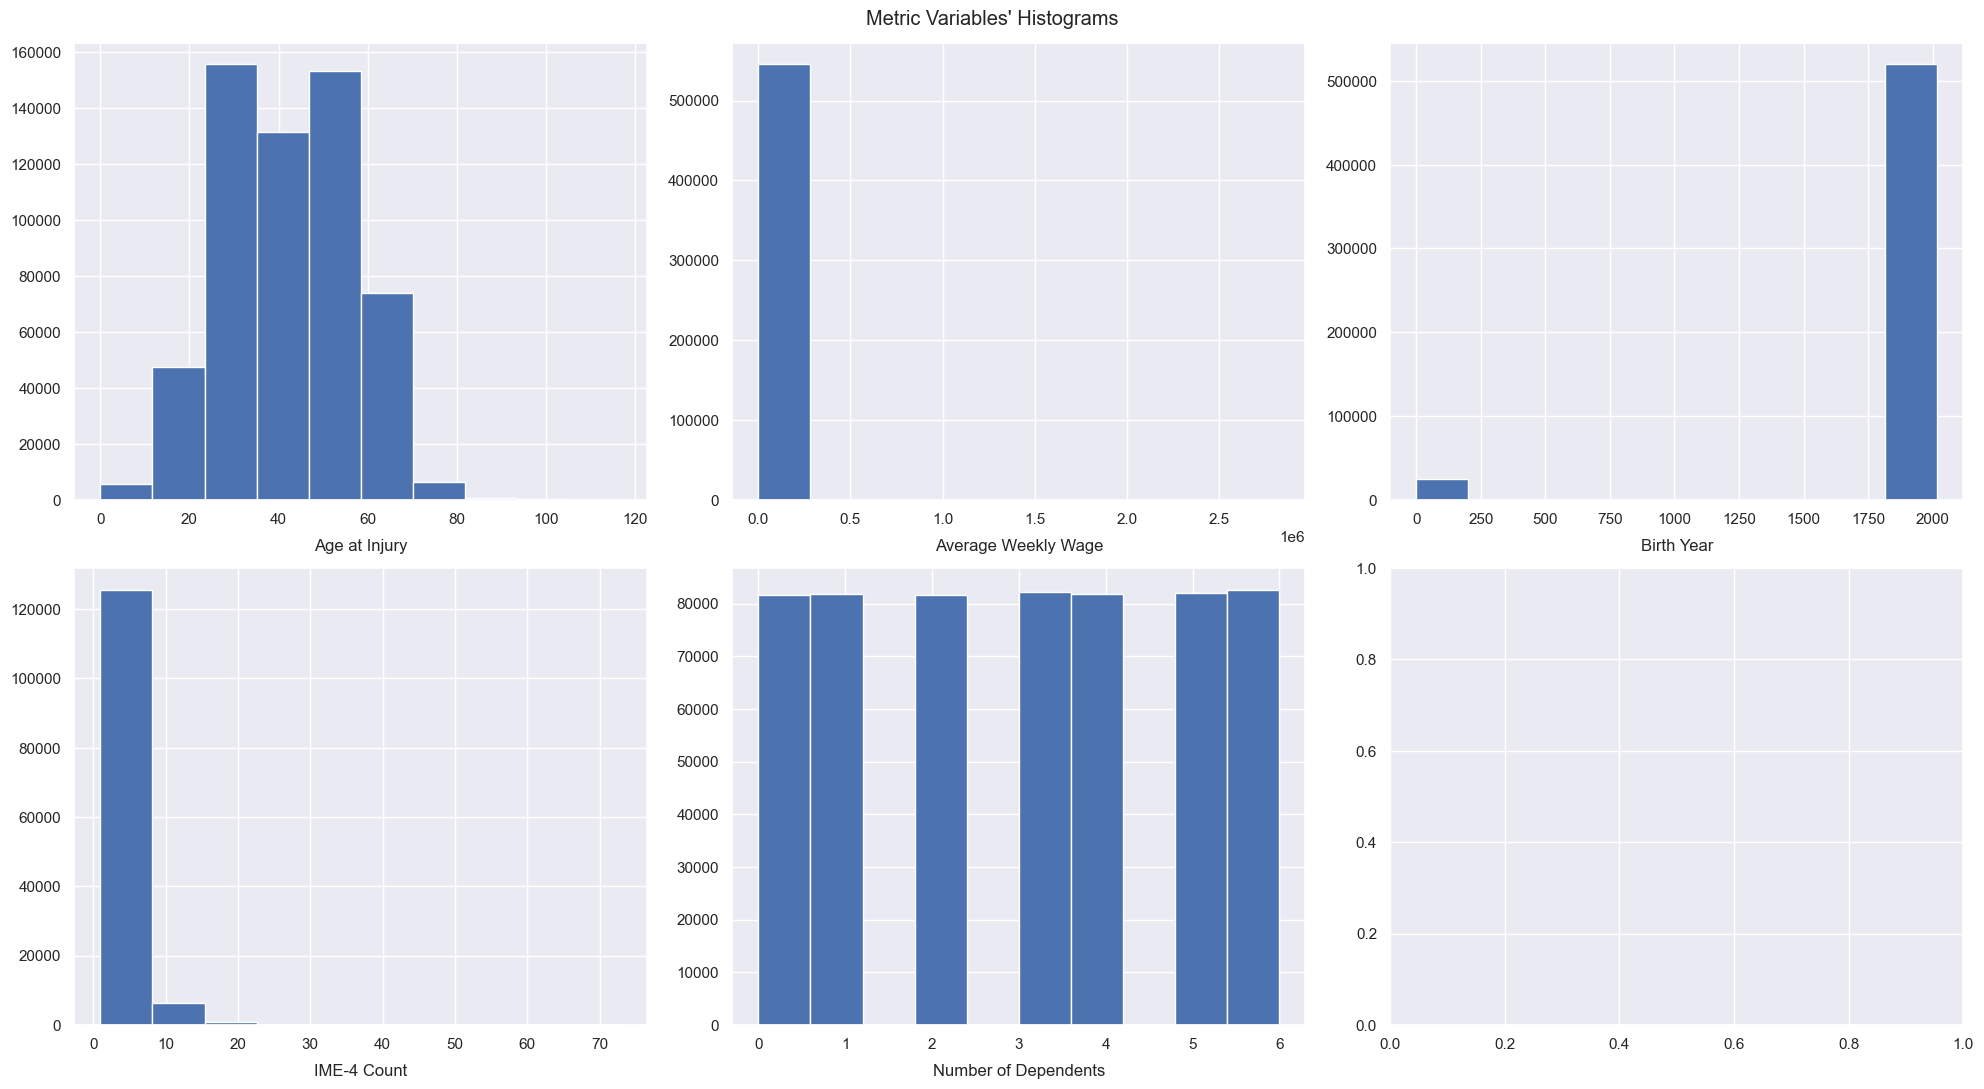

In [17]:
# Plot all Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

# Prepare figure. Create individual axes where each histogram will be placed
sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows) 


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                        tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_cols): 
    ax.hist(train_data[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Histograms"

plt.suptitle(title)

plt.show()

With Boxplots for all Numeric Variables we get further visual insights in our data, especially concerning possible outliers

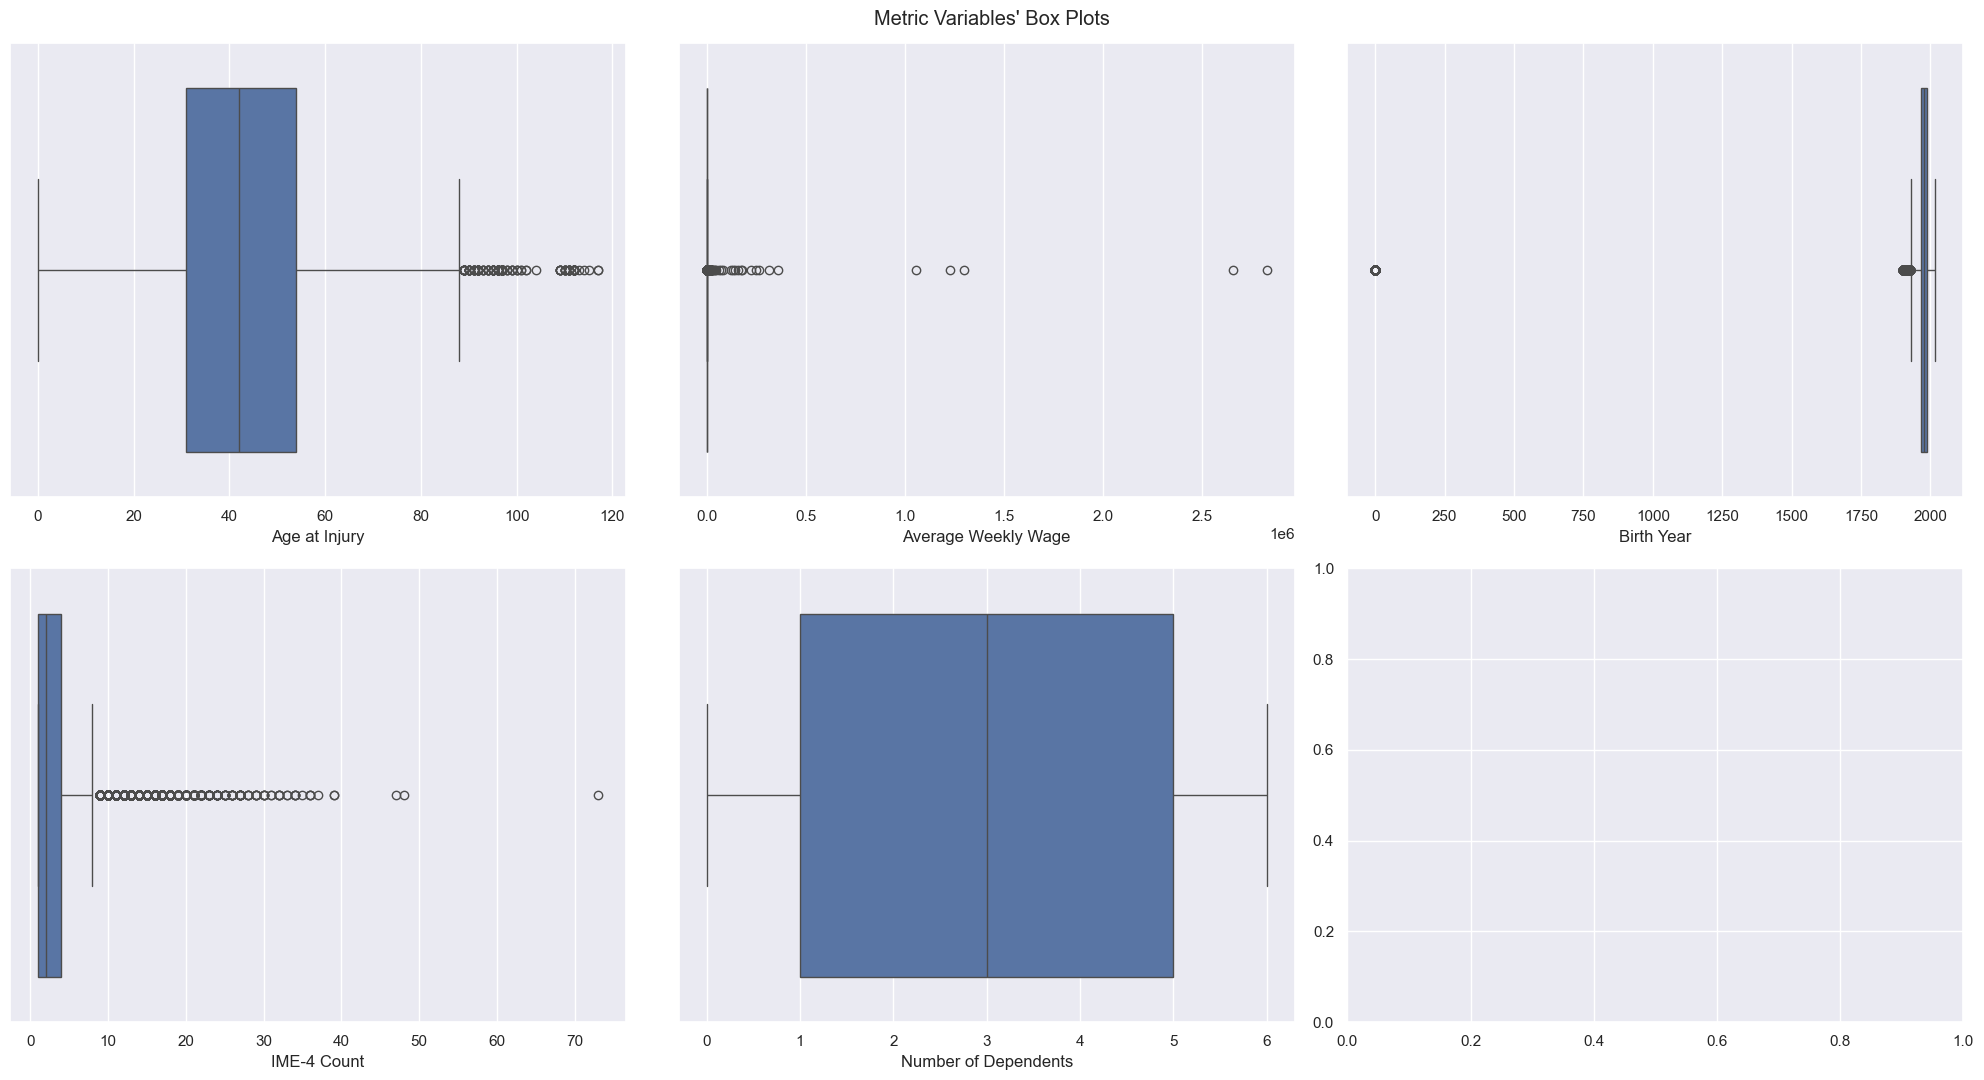

In [18]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set() ## Reset to darkgrid

sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram 
for ax, feat in zip(axes.flatten(), metric_cols): 
    sns.boxplot(x=train_data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Box Plots"

plt.suptitle(title)

plt.show()

# Notes, incoherensies and Conclusions on Data Exploration


* General:
    * Number of dependents -column is not in metadata. It maybe refers to to the number of people who are financially dependent on the injured worker.
    * OIICS Nature of Injury is full of missing values
    * Few of the columns had class imbalances (mentioned below)
    * **Target variable: WCB Decision** is either missing(3.3% of cases) or **always** just Non work related

* Null-values and missing values:
    ![image.png](attachment:image.png)



* Incoherensies
    * **19445 seems to be usual number for missing values!! --> Probably 19445 rows with null-values in almost every field. Those probably can be deleted**
    * **OIICS Nature of Injury is that full of missing values!!**
    * Accident date: 23134 missing values (3.9% of data)
    * Age at injury: 19445 missing values (3.3% of data)
    * Alternative Dispute Resolution: 19445 missing values (3.3% of data)
    * Attorney/Rep... : 19445 missing values (3.3% of data)
    * Averegae weekly wage:
        * Missing: (8.1%)
        * **Zeros: 335450 so over 56% of data is zeros**
    * Birth year:
        * Missing values (8.1%)
        * Zeros (4.2%)
    * C-2 date: 5.7% missing
    * C-3 date: **68.4% missing**
    * Carrier name: 19445 missing values (3.3% of data)
    * Carrier type: 19445 missing values (3.3% of data)
    * County of injury: 19445 missing values (3.3% of data)
    * COVID 19 Indicator: 19445 missing values (3.3% of data)
    * Gender, District Name, First hearing date: 19445 missing values (3.3% of data)
    * IM-4 Count: **77.6% Missing**
    * Industry code: 5% Missing
    * Industry code Desc.: Same as above
    * Medical Fee Region: 19445 missing values (3.3% of data)
    * ALL WCIO.. columns: 5.9-6.2 % Missing
    * Zip Code: 8% missing
    * **TARGET VARIABLE Agreement Reached: 19445 missing values (3.3% of data)**
    * **TARGET VARIABLE: Claim injury type: 19445 missing values (3.3% of data)**
    * **TARGET VARIABLE: WCB Decision: 19445 missing values (3.3% of data)**
    
    

* Types:
    * Attorney/Representative --> Should be Bool
    * COVID 19 Indicator --> SHould be Bool
    * **TARGET VARIABLE Agreement Reached --> Should be Bool**
    * Age and year of birth could be int instead of float
    * Accident Date, First Hearing Date, Assembly Date, C-2 Date and C-3 Date were changed to pandas datetime

* Duplicates
    * 1 Duplicate claim identifier --> This duplicate should be dropped since we can't know, which one is the correct one. (Should be unique for all rows)

* Imbalances
    * Alternative Dispute Resolution: **Massive class imbalance** (N dominates with 96%)
    * Attorney/Representative: Some class imbalance. (N dominates with 66%)
    * COVID 19 Indicator: **Massive class imbalance** (False dominates with 92%)
    * **TARGET VARIABLE Agreement Reached: Massive class imbalance (0 dominates with 92%)**


* More
    * Max age 117 (later we can threshold age to proficient range) and **min age is 0 and there was 5464 instances of those.** 

* Analysis on histograms and boxplots
    * We can already see (in for example, Birth Year and IME4 -Count) that outliers are affecting some of our plots. We need to do outlier processing later on.
    * Birth year mean is near 1886 while age mean is near 42. 0 -values in birth year effect Birth year statistics. Null value handling important.
    * Age at Injury seems to be closest to normal distribution


# Data Preprocessing: Type conversions and duplicated rows

In [19]:
# 1. Datatype conversions

# DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
# Checking column 29 values for mixed types
print(train_data.columns[29])
print(train_data['Zip Code'].unique())

# Because it is ZipCode we will treat the values as string.
train_data['Zip Code'] = train_data['Zip Code'].astype(str)
test_data['Zip Code'] = test_data['Zip Code'].astype(str)

Zip Code
['13662' '14569' '12589' ... 'G9B0Y' '15143' '07122']


In [20]:
# See if test_data Claim Identifier has missing values or duplicates
print(test_data['Claim Identifier'].isna().sum())
print(test_data['Claim Identifier'].duplicated().sum())


0
0


In [21]:
# 1. Datatype conversions

# Setting the index to Claim Identifier
train_data = train_data.set_index('Claim Identifier', drop=True)
non_metric_cols.remove('Claim Identifier')

# Set test data index to Claim Identifier
test_data = test_data.set_index('Claim Identifier', drop=True)

# Dates to matching format
train_data ['Accident Date'] = pd.to_datetime(train_data ['Accident Date'])
train_data ['Assembly Date'] = pd.to_datetime(train_data ['Assembly Date'])
train_data ['C-2 Date'] = pd.to_datetime(train_data ['C-2 Date'])
train_data ['C-3 Date'] = pd.to_datetime(train_data ['C-3 Date'])
train_data ['First Hearing Date'] = pd.to_datetime(train_data ['First Hearing Date'])


In [22]:
# 1. Datatype conversions

#Booleans 

# Attorney/Representative
train_data['Attorney/Representative'] = train_data['Attorney/Representative'].map({'Y': True, 'N': False}).astype('boolean')

# COVID-19 Indicator
train_data['COVID-19 Indicator'] = train_data['COVID-19 Indicator'].map({'Y': True, 'N': False}).astype('boolean')

# Agreement Reached
train_data['Agreement Reached'] = train_data['Agreement Reached'].astype(float)
train_data['Agreement Reached'] = train_data['Agreement Reached'].map({1: True, 0: False}).astype('boolean')

print(train_data['Attorney/Representative'].unique())
print(train_data['COVID-19 Indicator'].unique())
print(train_data['Agreement Reached'].unique())

<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
<BooleanArray>
[False, <NA>, True]
Length: 3, dtype: boolean
<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean


In [23]:
# 2. Datatype conversions

# Alternative Dispute Resolution. We will drop the rows with 'U' values since we assume that it means unknown. There is only 5 rows with 'U' values.
train_data = train_data[train_data['Alternative Dispute Resolution'] != "U"]
train_data['Alternative Dispute Resolution'] = train_data['Alternative Dispute Resolution'].map({'Y': True, 'N': False}).astype('boolean')

print(train_data['Alternative Dispute Resolution'].unique())

<BooleanArray>
[False, <NA>, True]
Length: 3, dtype: boolean


In [24]:
# 2. Duplicated rows

# Check for duplicates in claim identifier which is the index
print(train_data.index.duplicated().sum())

# Access the duplicated claim identifier rows. The duplicated claim identifier is 292668076
train_data[train_data.index.duplicated()]

#Check length of the train data
print(len(train_data))

# Drop the duplicated claim identifier row with claim identifier of 292668076 because we can't have duplicate claim identifiers. We don't know which one is correct.
if(train_data.index.duplicated().sum() > 0):
    train_data.drop(index=292668076, inplace=True)

# Check for duplicates in claim identifier to make sure the duplicated claim identifier is dropped
print(train_data.index.duplicated().sum())

# Check length of the train data to make sure the duplicated claim identifier is dropped
print(len(train_data))

1
593466
0
593464


# Data Preprocessing: Missing values

In [25]:
# 2. Missing values

# Check for missing values and calculate percentage of missing values
print(train_data.isnull().sum())
missing_percentage_train = (train_data.isnull().sum() / len(train_data)) * 100

Accident Date                          23132
Age at Injury                          19443
Alternative Dispute Resolution         19443
Assembly Date                              0
Attorney/Representative                19443
Average Weekly Wage                    48093
Birth Year                             48521
C-2 Date                               33998
C-3 Date                              406220
Carrier Name                           19443
Carrier Type                           19443
Claim Injury Type                      19443
County of Injury                       19443
COVID-19 Indicator                     19443
District Name                          19443
First Hearing Date                    442666
Gender                                 19443
IME-4 Count                           460662
Industry Code                          29397
Industry Code Description              29397
Medical Fee Region                     19443
OIICS Nature of Injury Description    593464
WCIO Cause

In [26]:
# 2. Missing values

# Only missing value columns, sorted descending
missing_percentage_train_filtered = missing_percentage_train[missing_percentage_train > 0].sort_values(ascending=False)
print("Missing Percentage Train Data:\n", missing_percentage_train_filtered)

Missing Percentage Train Data:
 OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622569
First Hearing Date                     74.590203
C-3 Date                               68.448971
Birth Year                              8.175896
Average Weekly Wage                     8.103777
WCIO Part Of Body Code                  6.153701
WCIO Part Of Body Description           6.153701
WCIO Nature of Injury Description       5.913585
WCIO Nature of Injury Code              5.913585
WCIO Cause of Injury Description        5.910721
WCIO Cause of Injury Code               5.910721
C-2 Date                                5.728738
Industry Code                           4.953460
Industry Code Description               4.953460
Accident Date                           3.897793
Medical Fee Region                      3.276189
Agreement Reached                       3.276189
WCB Decision                            3.276189
Gender                               

In [27]:
#2. Missing values

# Because of %100 missing values we dropped OIICS Nature of Injury Description
train_data.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
non_metric_cols.remove('OIICS Nature of Injury Description')

# We fill na with 0 because we assume that there was 0 submission made.
train_data['IME-4 Count'] = train_data['IME-4 Count'].fillna(0)

# As mentioned in data desciption "A blank date means the claim has not yet had ahearing held." so we filled with none.
train_data['First Hearing Date'] = train_data['First Hearing Date'].fillna(pd.NaT)

# We also treated these dates like First Hearing Date.
train_data['C-3 Date'] = train_data['C-3 Date'].fillna(pd.NaT)
train_data['C-2 Date'] = train_data['C-2 Date'].fillna(pd.NaT)



In [28]:
# 2. Missing values

# Check for missing values
print(train_data.isnull().sum().sort_values(ascending=False))

# Percentage of missing values for Columns
new_missing_percentage_train = (train_data.isnull().sum() / len(train_data)) * 100

# Only missing value columns, sorted descending
new_missing_percentage_train_filtered = new_missing_percentage_train[new_missing_percentage_train > 0].sort_values(ascending=False)

# Missing Percentage Train Data
print(new_missing_percentage_train_filtered)

First Hearing Date                   442666
C-3 Date                             406220
Birth Year                            48521
Average Weekly Wage                   48093
WCIO Part Of Body Description         36520
WCIO Part Of Body Code                36520
WCIO Nature of Injury Description     35095
WCIO Nature of Injury Code            35095
WCIO Cause of Injury Description      35078
WCIO Cause of Injury Code             35078
C-2 Date                              33998
Industry Code                         29397
Industry Code Description             29397
Accident Date                         23132
District Name                         19443
Age at Injury                         19443
WCB Decision                          19443
Agreement Reached                     19443
Alternative Dispute Resolution        19443
Attorney/Representative               19443
Carrier Name                          19443
Carrier Type                          19443
Claim Injury Type               

#### As we can see, there seems to be 19443 rows that are missing columns:
* District Name                         19443
* Age at Injury                         19443
* WCB Decision                          19443
* Agreement Reached                     19443
* Alternative Dispute Resolution        19443
* Attorney/Representative               19443
* Carrier Name                          19443
* Carrier Type                          19443
* Claim Injury Type                     19443
* Medical Fee Region                    19443
* County of Injury                      19443
* COVID-19 Indicator                    19443
* Gender                                19443
* Number of Dependents                  19443


In [29]:
# 2. Missing values

# Let's check id these are all same rows. If they are, they can be deleted since they have so much missing values.

# Check if the rows with missing values in the specified columns are the same
missing_rows = train_data[
    train_data[['Age at Injury', 'WCB Decision', 'Medical Fee Region', 'Gender', 'Number of Dependents', 
                'District Name', 'County of Injury', 'Claim Injury Type', 'Carrier Type', 'Carrier Name', 'Agreement Reached',
                 'Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator', ]].isnull().all(axis=1)
]

# Display the unique index values of the rows with missing values
unique_missing_indices = missing_rows.index.unique()
print(unique_missing_indices)



Index([957648180, 363651794, 209507552, 970865999, 807753247, 395971406,
       379574235, 219983378, 108063827, 976835988,
       ...
       598060578, 875139158, 945987214, 766903150, 953136297, 365870975,
       327160035, 249875936, 120584215, 818961390],
      dtype='int64', name='Claim Identifier', length=19443)


#### We found out that the rows with missing values in the specified columns are the same. We can drop these rows.

In [30]:
# 2. Missing values

# Drop the rows with missing values in the specified columns
train_data.drop(index=unique_missing_indices, inplace=True)

# Check now for amount and percentage of missing values

# Missing Percentage Train Data
missing_percentage_train_after_null_handling = (train_data.isnull().sum() / len(train_data)) * 100

# Only missing value columns, sorted descending
missing_percentage_train_after_null_handling_filtered = missing_percentage_train_after_null_handling[missing_percentage_train_after_null_handling > 0].sort_values(ascending=False)
print("Missing Percentage Train Data:\n", missing_percentage_train_after_null_handling_filtered)


Missing Percentage Train Data:
 First Hearing Date                   73.729533
C-3 Date                             67.380287
Birth Year                            5.065668
Average Weekly Wage                   4.991107
WCIO Part Of Body Code                2.974978
WCIO Part Of Body Description         2.974978
WCIO Nature of Injury Code            2.726730
WCIO Nature of Injury Description     2.726730
WCIO Cause of Injury Code             2.723768
WCIO Cause of Injury Description      2.723768
C-2 Date                              2.535622
Industry Code                         1.734083
Industry Code Description             1.734083
Accident Date                         0.642659
dtype: float64


In [31]:
# 2. Missing values

train_data.describe(include='object')

# Cast booleans to bool
train_data['COVID-19 Indicator'] = train_data['COVID-19 Indicator'].astype(bool)
train_data['Agreement Reached'] = train_data['Agreement Reached'].astype(bool)
train_data['Alternative Dispute Resolution'] = train_data['Alternative Dispute Resolution'].astype(bool)

# Check for datatypes of the columns to see if they are correct
print(train_data.dtypes)

Accident Date                        datetime64[ns]
Age at Injury                               float64
Alternative Dispute Resolution                 bool
Assembly Date                        datetime64[ns]
Attorney/Representative                     boolean
Average Weekly Wage                         float64
Birth Year                                  float64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Injury Type                            object
County of Injury                             object
COVID-19 Indicator                             bool
District Name                                object
First Hearing Date                   datetime64[ns]
Gender                                       object
IME-4 Count                                 float64
Industry Code                               float64
Industry Cod

### We noticed that the Age at Injury column is float. We will convert it to integer.

In [32]:
# Age at Injury Datatype conversion
train_data['Age at Injury'] = train_data['Age at Injury'].astype(int)


In [33]:
# 2. Missing values

# Check all columns with missing values
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Missing Percentage Train Data:\n", missing_percentage)

Missing Percentage Train Data:
 First Hearing Date                   73.729533
C-3 Date                             67.380287
Birth Year                            5.065668
Average Weekly Wage                   4.991107
WCIO Part Of Body Code                2.974978
WCIO Part Of Body Description         2.974978
WCIO Nature of Injury Code            2.726730
WCIO Nature of Injury Description     2.726730
WCIO Cause of Injury Code             2.723768
WCIO Cause of Injury Description      2.723768
C-2 Date                              2.535622
Industry Code                         1.734083
Industry Code Description             1.734083
Accident Date                         0.642659
dtype: float64


# Solution to handle rest of the missing values 

1. Delete rows with missing accident dates since it’s minimal:
With only 0.64% missing, dropping these rows has a very small impact on the dataset's overall size and representativeness.

2. Derive birth year for missing values:
This data can be calculated accurately from existing columns (age at injury and accident date), avoiding the need for deletion.

3. Average weekly wage: Discard the column since:
- We tried to do median filling igonring the 0 values but it led to very uneven distribution.
- We tried knn filling but we still end up to very uneven distribution.
- It is not a critical feature for the model according to pearson's and spearman's correlation (Found in y-profiling report. Not visible in end submission due to large html output).
- It has "only" 4.99% missing values. This is not ideal but we tried our best to keep the data.

4. Set missing as unknown for the WCIO-related codes and industry columns (0 for codes and "UNKNOWN" for descriptions):
Mapping empty as an "Unknown" category preserves all data while acknowledging the missing values.

5. C-2 Date: We calculated the difference of C-2 Date to Accident date, took median of the difference and imputed nullvalues with accident date + the median of difference.

6. C3-Date: We decided to drop the column since it doesn't seem important for the preditcion of the target variable. 
    * Metadata: "Date Form C-3 (Employee Claim Form) was received."
        * Based on the description of the column and considering the missing values, this probably is not significant predictor variable for the Claim Injury Type.

FIRST HEARING DATE WILL BE REVISITED IN THE PART 2 OF THE PROJECT.
* We are going to reconsider experimenting with the First Hearing Date included in the project part 2.

7. First Hearing Date: We decided to drop the column since it didn't seem important for the preditcion of the target variable. 
    * This is the decision that we are going to re-consider

In [34]:
#  2. Missing values

# Handle column by column
'''
Missing Percentage Train Data:
First Hearing Date                   73.729533
C-3 Date                             67.380287
C-2 Date                              2.535622

Birth Year                           5.065668
Average Weekly Wage                  4.991107
WCIO Part Of Body Code               2.974978
WCIO Part Of Body Description        2.974978
WCIO Nature of Injury Code           2.726730
WCIO Nature of Injury Description    2.726730
WCIO Cause of Injury Code            2.723768
WCIO Cause of Injury Description     2.723768
Industry Code                        1.734083
Industry Code Description            1.734083
Accident Date                        0.642659
'''


# Accident Date

# Drop rows with missing Accident Date
train_data.dropna(subset=['Accident Date'], inplace=True)

# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

First Hearing Date                   73.814024
C-3 Date                             67.773683
Birth Year                            5.067575
Average Weekly Wage                   4.989199
WCIO Part Of Body Description         2.717540
WCIO Part Of Body Code                2.717540
WCIO Nature of Injury Description     2.459445
WCIO Nature of Injury Code            2.459445
WCIO Cause of Injury Description      2.457165
WCIO Cause of Injury Code             2.457165
C-2 Date                              2.276919
Industry Code                         1.582938
Industry Code Description             1.582938
WCB Decision                          0.000000
Agreement Reached                     0.000000
Zip Code                              0.000000
Medical Fee Region                    0.000000
Accident Date                         0.000000
IME-4 Count                           0.000000
Gender                                0.000000
Age at Injury                         0.000000
District Name

In [35]:
# Birth Year

# Calculate the Birth Year by subtracting the Age at Injury from the Accident Date for rows with missing values in Birth Year
train_data.loc[train_data['Birth Year'].isnull(), 'Birth Year'] = train_data['Accident Date'].dt.year - train_data['Age at Injury']

# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

# Validate the Birth Year column values to be valid
print(train_data['Birth Year'].unique())
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

# We noticed that the Birth Year column is float. We will convert it to integer.
train_data['Birth Year'] = train_data['Birth Year'].astype(int)

# Validate the Birth Year column values again
print(train_data['Birth Year'].unique())
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

First Hearing Date                   73.814024
C-3 Date                             67.773683
Average Weekly Wage                   4.989199
WCIO Part Of Body Description         2.717540
WCIO Part Of Body Code                2.717540
WCIO Nature of Injury Description     2.459445
WCIO Nature of Injury Code            2.459445
WCIO Cause of Injury Description      2.457165
WCIO Cause of Injury Code             2.457165
C-2 Date                              2.276919
Industry Code Description             1.582938
Industry Code                         1.582938
WCB Decision                          0.000000
Agreement Reached                     0.000000
Zip Code                              0.000000
IME-4 Count                           0.000000
Medical Fee Region                    0.000000
Accident Date                         0.000000
Gender                                0.000000
Age at Injury                         0.000000
District Name                         0.000000
COVID-19 Indi

In [36]:
# Average Weekly Wage

# Drop the Average Weekly Wage column
train_data.drop(columns=['Average Weekly Wage'], inplace=True)
metric_cols.remove('Average Weekly Wage')


In [37]:
# NOTE: We commented out our efforts on handling weekly wage without dropping the column. Decided to leave the efforts visible for the sake of the process.

# # Average Weekly Wage -transform to categorical

# '''
# We can assgin the average weekly wage as "No Wage" for 0 values, "Low Wage" for up to 25th percentile, 
# "Medium Wage" for 25th to 75th percentile, "High Wage" for above the 75th percentile.

# "No Wage" (0 values)
# "Low Wage" (up to 25th percentile excl. 0 values)
# "Medium Wage" (25th to 75th percentileexcl. 0 values)
# "High Wage" (above the 75th percentileexcl. 0 values)

# This will make the average wage column categorical and we can drop the numerical column.
# '''

# # Create new column for Average Weekly Wage category as empty at this point
# train_data['Average Weekly Wage Category'] = ''

# # Calculate the 25th percentile for the Average Weekly Wage column for other values than 0
# average_weekly_wage_lower_percentile = train_data[train_data['Average Weekly Wage'] != 0]['Average Weekly Wage'].quantile(0.25)
# print(average_weekly_wage_lower_percentile)

# # Calculate the 75th percentile for the Average Weekly Wage column for other values than 0
# average_weekly_wage_upper_percentile = train_data[train_data['Average Weekly Wage'] != 0]['Average Weekly Wage'].quantile(0.75)
# print(average_weekly_wage_upper_percentile)

# # Calculate the 90th percentile for the Average Weekly Wage column for other values than 0
# average_weekly_wage_upper_percentile_90 = train_data[train_data['Average Weekly Wage'] != 0]['Average Weekly Wage'].quantile(0.90)
# print(average_weekly_wage_upper_percentile_90)


# # Check the amount of rows in 25th, between 25th and 75th, between 75th and 90th percentiles and above 90th percentile
# print(len(train_data[train_data['Average Weekly Wage'] == 0]))
# print(len(train_data[(train_data['Average Weekly Wage'] != 0) & (train_data['Average Weekly Wage'] <= average_weekly_wage_lower_percentile)]))
# print(len(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_lower_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile)]))
# print(len(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile_90)]))
# print(len(train_data[train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile_90]))


# """
# We checked the distribution with 4 categories but noticed that in highest wage category, there are very non-uniform distribution.
# We decided to divide the high values into 2 categories, splitting the highest 10% into a new category.
# """
# # Check the distribution of the Average Weekly Wage column
# # Plot histograms for each category

# plt.figure(figsize=(20, 20))

# plt.subplot(3, 2, 1)
# plt.hist(train_data[train_data['Average Weekly Wage'] == 0]['Average Weekly Wage'], bins=2)
# plt.title('Distribution of Average Weekly Wage - No Wage')

# plt.subplot(3, 2, 2)
# plt.hist(train_data[(train_data['Average Weekly Wage'] != 0) & (train_data['Average Weekly Wage'] <= average_weekly_wage_lower_percentile)]['Average Weekly Wage'], bins=10)
# plt.title('Distribution of Average Weekly Wage - Low Wage')

# plt.subplot(3, 2, 3)
# plt.hist(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_lower_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile)]['Average Weekly Wage'], bins=10)
# plt.title('Distribution of Average Weekly Wage - Medium Wage')

# plt.subplot(3, 2, 4)
# plt.hist(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile_90)]['Average Weekly Wage'], bins=10)
# plt.title('Distribution of Average Weekly Wage - High Wage')

# plt.subplot(3, 2, 5)
# plt.hist(train_data[train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile_90]['Average Weekly Wage'], bins=5)
# plt.title('Distribution of Average Weekly Wage - Very High Wage')




# # Assign the Average Weekly Wage Category based on the percentiles
# train_data.loc[train_data['Average Weekly Wage'] == 0, 'Average Weekly Wage Category'] = 'No Wage'
# train_data.loc[(train_data['Average Weekly Wage'] != 0) & (train_data['Average Weekly Wage'] <= average_weekly_wage_lower_percentile), 'Average Weekly Wage Category'] = 'Low Wage'
# train_data.loc[(train_data['Average Weekly Wage'] > average_weekly_wage_lower_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile), 'Average Weekly Wage Category'] = 'Medium Wage'
# train_data.loc[(train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile_90), 'Average Weekly Wage Category'] = 'High Wage'
# train_data.loc[train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile_90, 'Average Weekly Wage Category'] = 'Very High Wage'

# train_data.head()

# # Drop the Average Weekly Wage column
# train_data.drop(columns=['Average Weekly Wage'], inplace=True)
# metric_cols.remove('Average Weekly Wage')

# non_metric_cols.append('Average Weekly Wage Category')

In [38]:
# First check that there are no 0's in any of these WCIO and Idustury columns
print(sorted(train_data['WCIO Part Of Body Code'].unique().tolist()))
print(sorted(train_data['WCIO Nature of Injury Code'].unique().tolist()))
print(sorted(train_data['WCIO Cause of Injury Code'].unique().tolist()))
print(sorted(train_data['Industry Code'].unique().tolist()))

# There are no 0's in any of these columns. We can set missing values as 0 and "UNKNOWN" for the descriptions.

# WCIO Part Of Body Code and WCIO Part Of Body Description  
# Set missing as unknown
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].fillna(0)
train_data['WCIO Part Of Body Description'] = train_data['WCIO Part Of Body Description'].fillna('0. UNKNOWN')

# # WCIO Nature of Injury Code and WCIO Nature of Injury Description
# # Set missing as unknown
train_data['WCIO Nature of Injury Code'] = train_data['WCIO Nature of Injury Code'].fillna(0)
train_data['WCIO Nature of Injury Description'] = train_data['WCIO Nature of Injury Description'].fillna('0. UNKNOWN')

# # WCIO Cause of Injury Code and WCIO Cause of Injury Description
# # Set missing as unknown
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].fillna(0)
train_data['WCIO Cause of Injury Description'] = train_data['WCIO Cause of Injury Description'].fillna('0. UNKNOWN')

# Industry Code and Industry Code Description
# Set missing as unknown
train_data['Industry Code'] = train_data['Industry Code'].fillna(0)
train_data['Industry Code Description'] = train_data['Industry Code Description'].fillna('0. UNKNOWN')


# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

[-9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 90.0, 91.0, nan, 99.0]
[1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 46.0, 47.0, 49.0, 52.0, 53.0, 54.0, 55.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 90.0, nan, 79.0, 83.0, 91.0]
[1.0, 2.0, 5.0, 12.0, 13.0, 16.0, 17.0, 19.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 45.0, 50.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 66.0, 68.0, 74.0, 75.0, 77.0, 79.0, 81.0, 82.0, 84.0, 87.0, 89.0, 95.0, 97.0, 99.0, nan, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 14.0, 15.0, 18.0, 20.0, 40.0, 

### We noticed that WCIO Part Of Body Code, WCIO Nature of Injury Code, WCIO Cause of Injury Code and Industry Code columns are float. We will convert them to integer.

In [39]:
# Convert the datatypes of the columns
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].astype(int)
train_data['WCIO Nature of Injury Code'] = train_data['WCIO Nature of Injury Code'].astype(int)
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].astype(int)
train_data['Industry Code'] = train_data['Industry Code'].astype(int)

# Check data types
print(train_data.dtypes)

Accident Date                        datetime64[ns]
Age at Injury                                 int64
Alternative Dispute Resolution                 bool
Assembly Date                        datetime64[ns]
Attorney/Representative                     boolean
Birth Year                                    int64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Injury Type                            object
County of Injury                             object
COVID-19 Indicator                             bool
District Name                                object
First Hearing Date                   datetime64[ns]
Gender                                       object
IME-4 Count                                 float64
Industry Code                                 int64
Industry Code Description                    object
Medical Fee 

In [40]:
#  2. Missing values

# Find columns that still have np.nan values
missing_values = train_data.isnull().sum()
print('Missing: ',missing_values[missing_values > 0])
# Find columns that still have 'None' values
none_values = train_data.isin(['None']).sum()
print('Nones: ',none_values[none_values > 0])
# Find columns that still might have 'nan' values
nan_values = train_data.isin(['nan']).sum()
print("nan's: ", nan_values[nan_values > 0])


Missing:  C-2 Date               12986
C-3 Date              386535
First Hearing Date    420985
dtype: int64
Nones:  Series([], dtype: Int64)


/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_75315/3380191528.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  nan_values = train_data.isin(['nan']).sum()


nan's:  C-2 Date               12986
C-3 Date              386535
First Hearing Date    420985
Zip Code               28456
dtype: Int64


### Replacing nans left in Zip Code with appropriate values

In [41]:

# Replacing nans left in Zip Code with appropriate values
train_data['Zip Code'] = train_data['Zip Code'].replace('nan', 'UNKNOWN')
# Find columns that still might have 'nan' values
nan_values = train_data.isin(['nan']).sum()
print("nan's: ", nan_values[nan_values > 0])

/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_75315/2434982565.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  nan_values = train_data.isin(['nan']).sum()


nan's:  C-2 Date               12986
C-3 Date              386535
First Hearing Date    420985
dtype: Int64


10.0

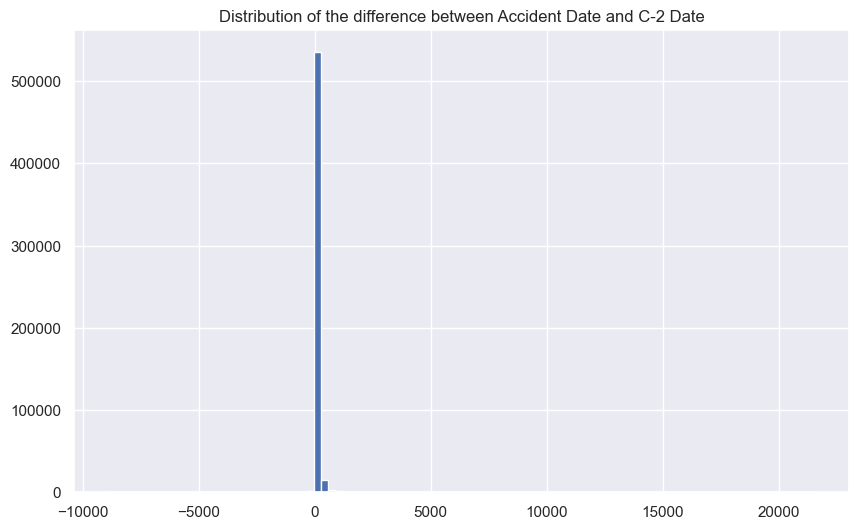

In [42]:
# C-2 Date

# We can assign new dates for NaT for C2-Date columns. Let's first check how does the C-2 Date looks like compared to Accident Date.

# Calculate the difference between Accident Date and C-2 Date
train_data_copy_date = train_data.copy()
train_data_copy_date['Accident_C2_Difference'] = (train_data_copy_date['C-2 Date'] - train_data_copy_date['Accident Date']).dt.days

# Plot the distribution of the difference between Accident Date and C-2 Date
plt.figure(figsize=(10, 6))
plt.hist(train_data_copy_date['Accident_C2_Difference'], bins=100)
plt.title('Distribution of the difference between Accident Date and C-2 Date')

# Describe the difference between Accident Date and C-2 Date
train_data_copy_date['Accident_C2_Difference'].describe()
train_data_copy_date['Accident_C2_Difference'].median()



### We see that median for difference between Accident Date and C-2 Date is 10. We can fill the missing values with accident date + 10 days.

In [43]:
# Fill missing values in C2-Date with Accident Date + 10 days
train_data['C-2 Date'] = train_data['C-2 Date'].fillna(train_data['Accident Date'] + pd.Timedelta(days=10))

print(train_data[['C-2 Date']].isnull().sum())

C-2 Date    0
dtype: int64


In [44]:
# Drop C-3 Date and First Hearing Date columns

# C-3 Date and First Hearing Date columns will be dropped.
train_data.drop(columns=['C-3 Date', 'First Hearing Date'], inplace=True)

In [45]:
non_metric_cols.remove('C-3 Date')
non_metric_cols.remove('First Hearing Date')

## We noticed that in C-2 Date there are 85 rows with C-2 Date before than Accident Date. We will also fill these with Accident Date + 10 days as we assume that they are errorous rows, since C-2 Date can not be before the Accident Date.

In [46]:
# We also noticed that in C-2 Date there are 85 rows with C-2 Date before than Accident Date. We will also fill these with Accident Date + 10 days.
train_data.loc[train_data['C-2 Date'] < train_data['Accident Date'], 'C-2 Date'] = train_data['Accident Date'] + pd.Timedelta(days=10)

# Data Preprocessing: Incoherent Values

In [47]:
# 2. Incoherent Values

# We have some assembly dates that are earlier than the accident date. We will drop these rows.
# Rows where 'Assembly Date' is earlier than 'Accident Date'
invalid_dates = train_data[train_data['Assembly Date'] < train_data['Accident Date']]
len(invalid_dates) # -> 1407 rows were spotted
train_data.drop(invalid_dates.index, inplace=True)

# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

Accident Date                        0.0
Age at Injury                        0.0
WCB Decision                         0.0
Agreement Reached                    0.0
Zip Code                             0.0
WCIO Part Of Body Description        0.0
WCIO Part Of Body Code               0.0
WCIO Nature of Injury Description    0.0
WCIO Nature of Injury Code           0.0
WCIO Cause of Injury Description     0.0
WCIO Cause of Injury Code            0.0
Medical Fee Region                   0.0
Industry Code Description            0.0
Industry Code                        0.0
IME-4 Count                          0.0
Gender                               0.0
District Name                        0.0
COVID-19 Indicator                   0.0
County of Injury                     0.0
Claim Injury Type                    0.0
Carrier Type                         0.0
Carrier Name                         0.0
C-2 Date                             0.0
Birth Year                           0.0
Attorney/Represe

# Data Preprocessing: Outliers

### Age at Injury:

We decided to create a treshold for the age in dataset

* Age minimum 14, since that is the legal lowest age for working in New York.
* Age maximum 75.
    * First we checked the amount of people in older age brakcets and saw that there were only 2401 people older than 75.
    * We also saw that there were many people still over 64 (legal retirement age) so we decided to push the limit higher than 64.
    * We believe that, although not supported by data, a higher age may correlate with an increased risk of injury. Therefore, we chose not to heavily factor this into our model.

In [48]:
# 3. Outliers

# Create thresholds for Age at Injury.

# Check amount of people who are older than 80
print(len(train_data[train_data['Age at Injury'] > 75]))

# Delete rows with Age at Injury over 75 and under 14
train_data = train_data[(train_data['Age at Injury'] >= 14) & (train_data['Age at Injury'] <= 75)]


2401


In [49]:
# 3. Outliers

# Check the length of the data
print(len(train_data))

# Check for max and min values in Birth Year
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

# We noticed that the lowest value in Birth Year is 0. We will fill the zeros similarly to null values for this column.
train_data.loc[train_data["Birth Year"] == 0, "Birth Year"] = train_data["Accident Date"].dt.year - train_data["Age at Injury"]

# Check for max and min values in Birth Year
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

# Check for maximum difference between age at injury and birth year. (Gap should be between -1 and 1 for valid data since some people may have had their birthday after/before the accident)
print((train_data['Accident Date'].dt.year - train_data['Birth Year'] - train_data['Age at Injury']).max())
print((train_data['Accident Date'].dt.year - train_data['Birth Year'] - train_data['Age at Injury']).min())

564702
0
2008
1920
2008
1
-1


### Identifying outliers from numeric columns with histograms and boxplots

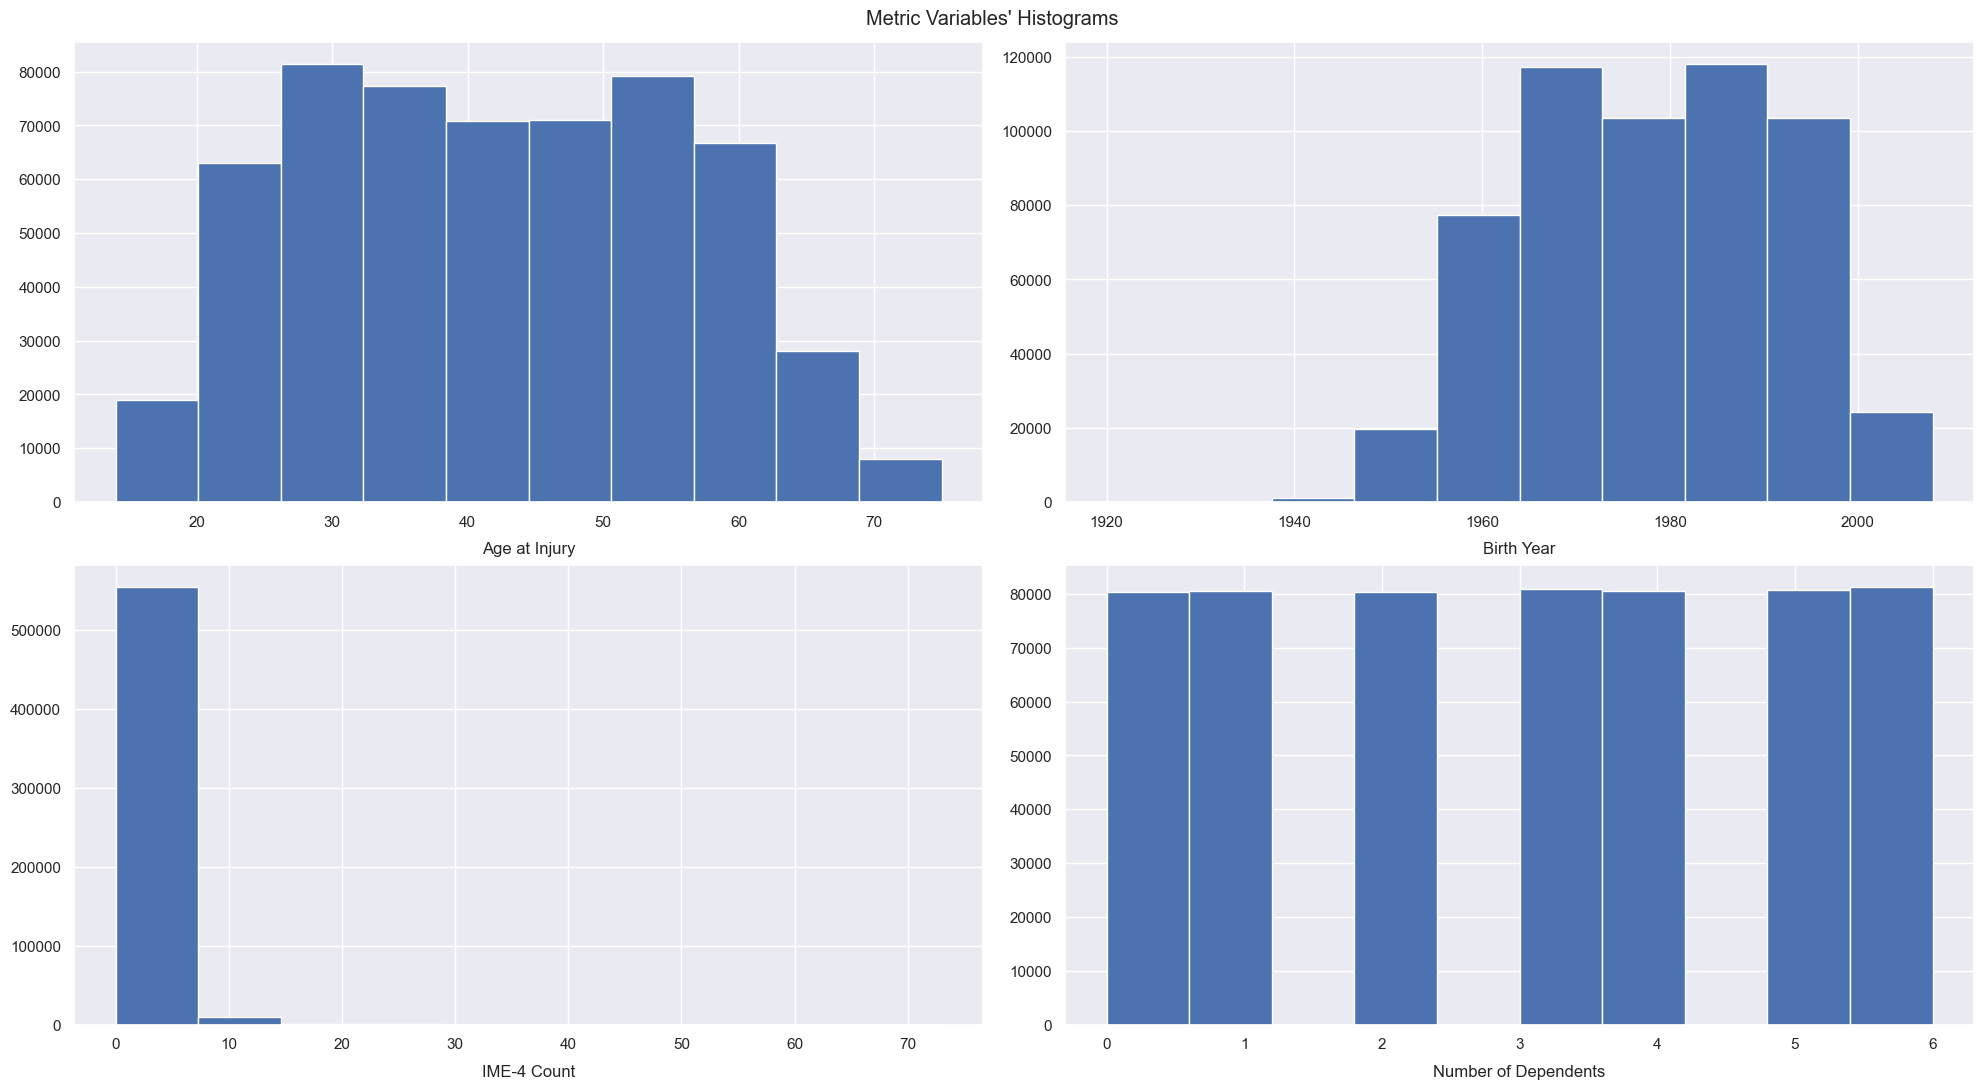

In [50]:
# 3. Outliers

# Check for outliers in the numeric columns

# Using boxplot and historgams to identify outliers

#Histogram
# Plot all Numeric Variables' Histograms in one figure
sns.set() ## Reset to darkgrid

# Prepare figure. Create individual axes where each histogram will be placed
sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows) 


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                        tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_cols): 
    ax.hist(train_data[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Histograms"

plt.suptitle(title)

plt.show()


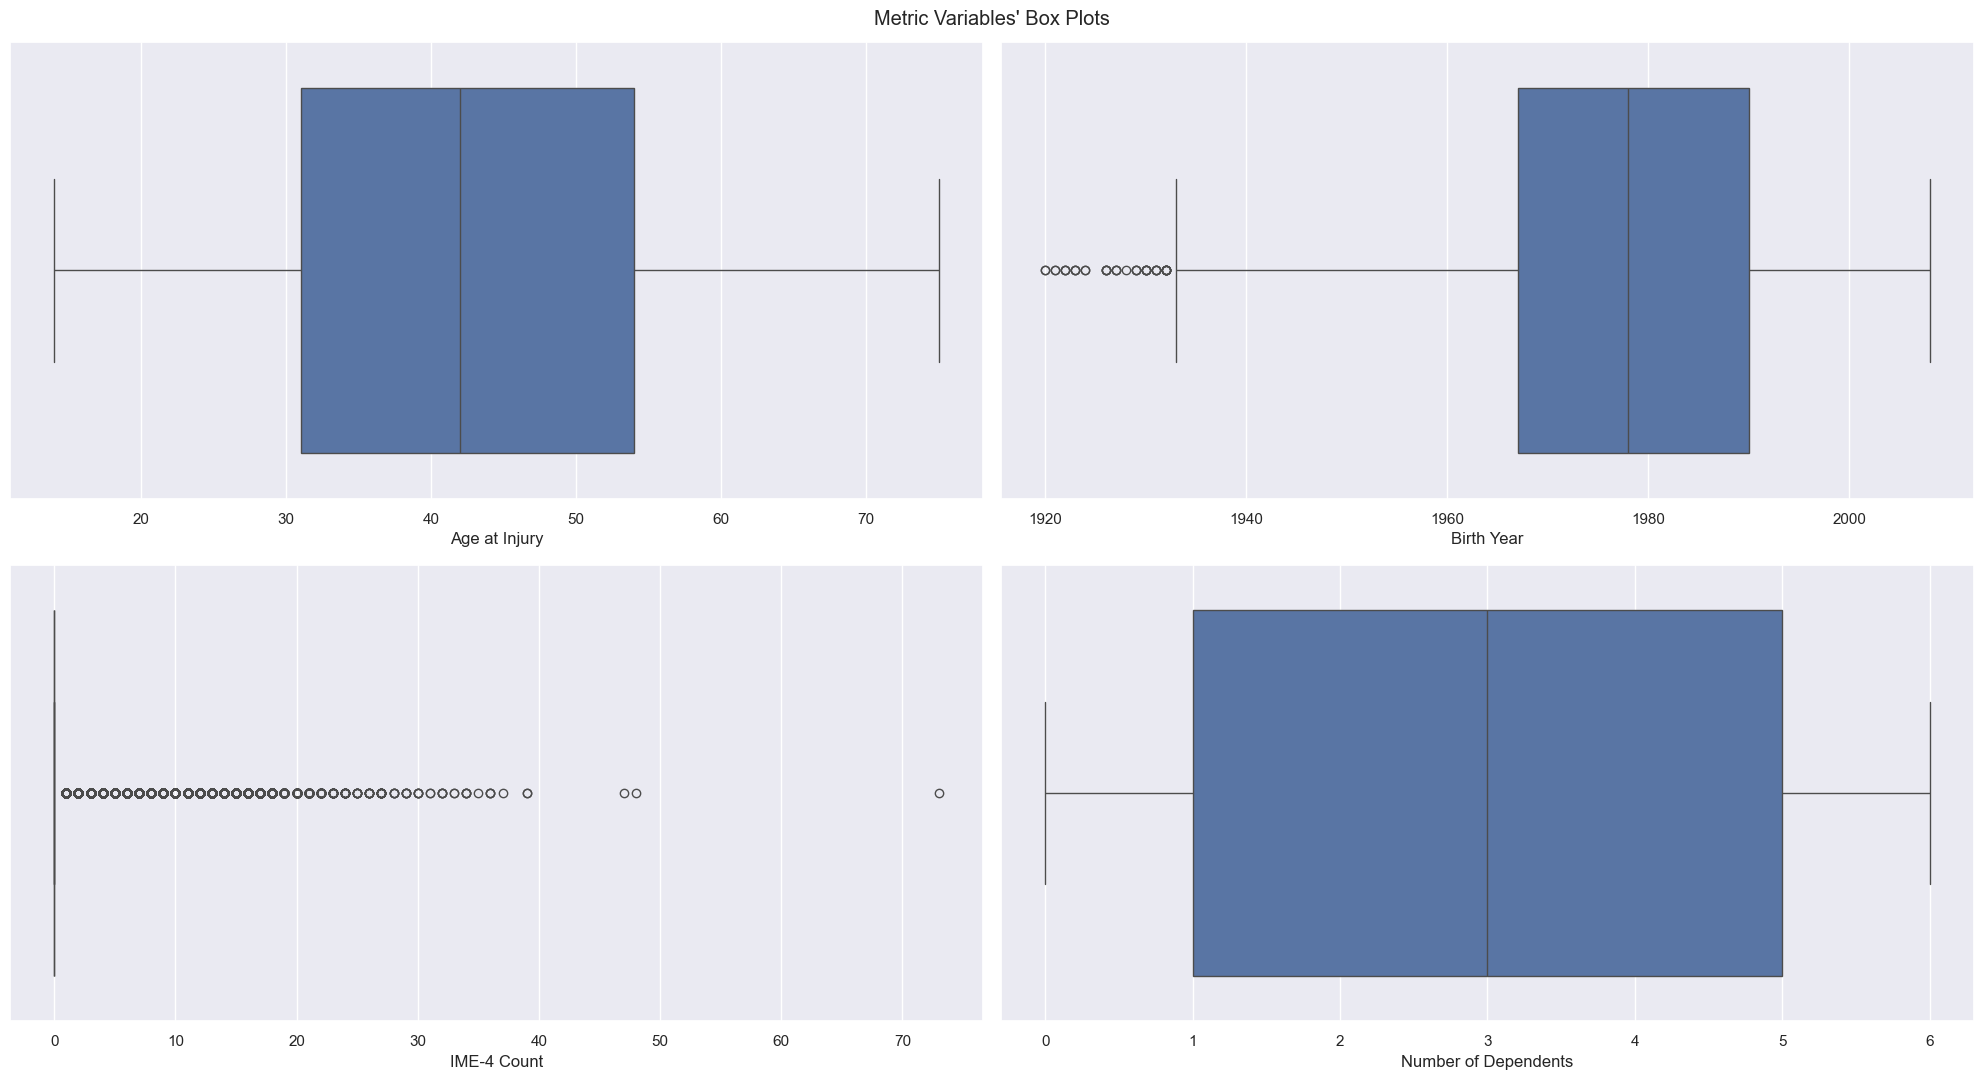

In [51]:
# Boxplots

# Plot ALL Numeric Variables' Boxplots in one figure

sns.set() ## Reset to darkgrid

sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram 
for ax, feat in zip(axes.flatten(), metric_cols): 
    sns.boxplot(x=train_data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Box Plots"

plt.suptitle(title)

plt.show()

#### We want to keep track of the amount of dropped data regularly through the outlier handling

In [52]:
# Check the amount of data dropped this far
original_length = 593471

print(original_length)
print(len(train_data))

dropped = (1-(len(train_data)/original_length))*100

print(dropped, " % of the data was dropped.")

593471
564702
4.847583116950959  % of the data was dropped.


### Let's go through the outliers in the metric data column by column

In [53]:
# 3. Outliers

# Age at Injury
"""
Outliers are already handled by the age limits set earlier.
"""

'\nOutliers are already handled by the age limits set earlier.\n'

#### For Birth year, we decided to get the outliers with IQR method. Data points outside the range [Q1-1.5xIQR Q3+1.5xIQR] were dropped

In [54]:
# 3. Outliers

# Birth Year
"""
Birth year has outliers below lower whisker. We will drop these rows.
"""

# Get the outliers in Birth Year with IQR method
Q1 = train_data['Birth Year'].quantile(0.25)
Q3 = train_data['Birth Year'].quantile(0.75)
IQR = Q3 - Q1

# Get the indexes of the outliers
outliers_birth_year = train_data[(train_data['Birth Year'] < (Q1 - 1.5 * IQR)) | (train_data['Birth Year'] > (Q3 + 1.5 * IQR))]
# See the range of the outliers Birth Year
print(outliers_birth_year['Birth Year'].min())
print(outliers_birth_year['Birth Year'].max())

# Drop the outliers
train_data.drop(outliers_birth_year.index, inplace=True)
print(len(train_data))

dropped = (1-(len(train_data)/original_length))*100
print(dropped, " % of the data was dropped.")

1920
1932
564663
4.854154625921058  % of the data was dropped.


#### Number of Dependents doesn't have outliers

In [55]:
# Number of Dependents
print(train_data['Number of Dependents'].max())
print(train_data['Number of Dependents'].min())
"""
Number of Dependents doesn't have outliers so we are fine
"""

6.0
0.0


"\nNumber of Dependents doesn't have outliers so we are fine\n"

### IME-4 Count
* We noticed that the IQR is 0 and amount of outliers is over 130 000 rows with IQR method. We tried z-score method.
* We noticed that z-score gives more appropriate amount of outliers and more reasonable range of values in outliers.
    * Even with z-score method, the z-score gives us 14064 rows as outliers. We are not comfortable dropping this many rows.
        * Lower limit for threshold value for the variable given by z-score was 7. In our opinion, given the decription of the metadata and the distribution of the data, this threshold is too big to use as criteria for dropping rows.
        * Also the upper limit for threshold given by z-score method is 73 which would be a hughe number to include to the data given the description and the distribution.

* We see that amount of outliers is 8838 if we set the upper threshold to 10. 
    * We think that considering metadata and dsitribution of the column this is a reasonable threshold.
        * 10 preserves enough data
        *  Metadata: "Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form."
            * Number higher than 10 seems unusual (and given the distribution of the data, it is rather unusual)


In [56]:
# IME-4 Count
"""
According to the boxplot, there are outliers in IME-4 Count. Let's see how many there are with IQR method
"""

# Get the outliers in IME-4 Count with IQR method
Q1 = train_data['IME-4 Count'].quantile(0.25)
Q3 = train_data['IME-4 Count'].quantile(0.75)
IQR = Q3 - Q1

# Get the indexes of the outliers
outliers_ime_4 = train_data[(train_data['IME-4 Count'] < (Q1 - 1.5 * IQR)) | (train_data['IME-4 Count'] > (Q3 + 1.5 * IQR))]

# See the amount of the outliers IME-4 Count
print(len(outliers_ime_4))

# Chekc the range of the outliers IME-4 Count
print(outliers_ime_4['IME-4 Count'].min())
print(outliers_ime_4['IME-4 Count'].max())

"""
We noticed that the IQR is 0 and amount of outliers is over 130 000 rows with IQR method. We will try z-score method.
"""

# Calculate the z-scores
z_scores = stats.zscore(train_data['IME-4 Count'])

# Get the indexes of the outliers
outliers_ime_4 = train_data[(z_scores < -3) | (z_scores > 3)]
print(len(outliers_ime_4))

# Check the range of the outliers IME-4 Count
print(outliers_ime_4['IME-4 Count'].min())
print(outliers_ime_4['IME-4 Count'].max())

# We noticed that z-score gives more appropriate amount of outliers and more reasonable range of values in outliers.

# See how many rows in outliers_ime_4 has value less than 10
print(len(outliers_ime_4[outliers_ime_4['IME-4 Count'] < 10]))

# We see that amount of outliers is 8838 if we set the threshold to 10. We think that considering metadata of the column this is a reasonable threshold.
# Drop the rows that have IME-4 Count more than 10
train_data = train_data[train_data['IME-4 Count'] <= 10]

# Check the length of the data
print(len(train_data))

dropped = (1-(len(train_data)/original_length))*100
print(dropped, " % of the data was dropped.")


130735
1.0
73.0
14064
7.0
73.0
8838
560886
5.490579994641697  % of the data was dropped.


#### Visualize the boxplots again for numeric columns.

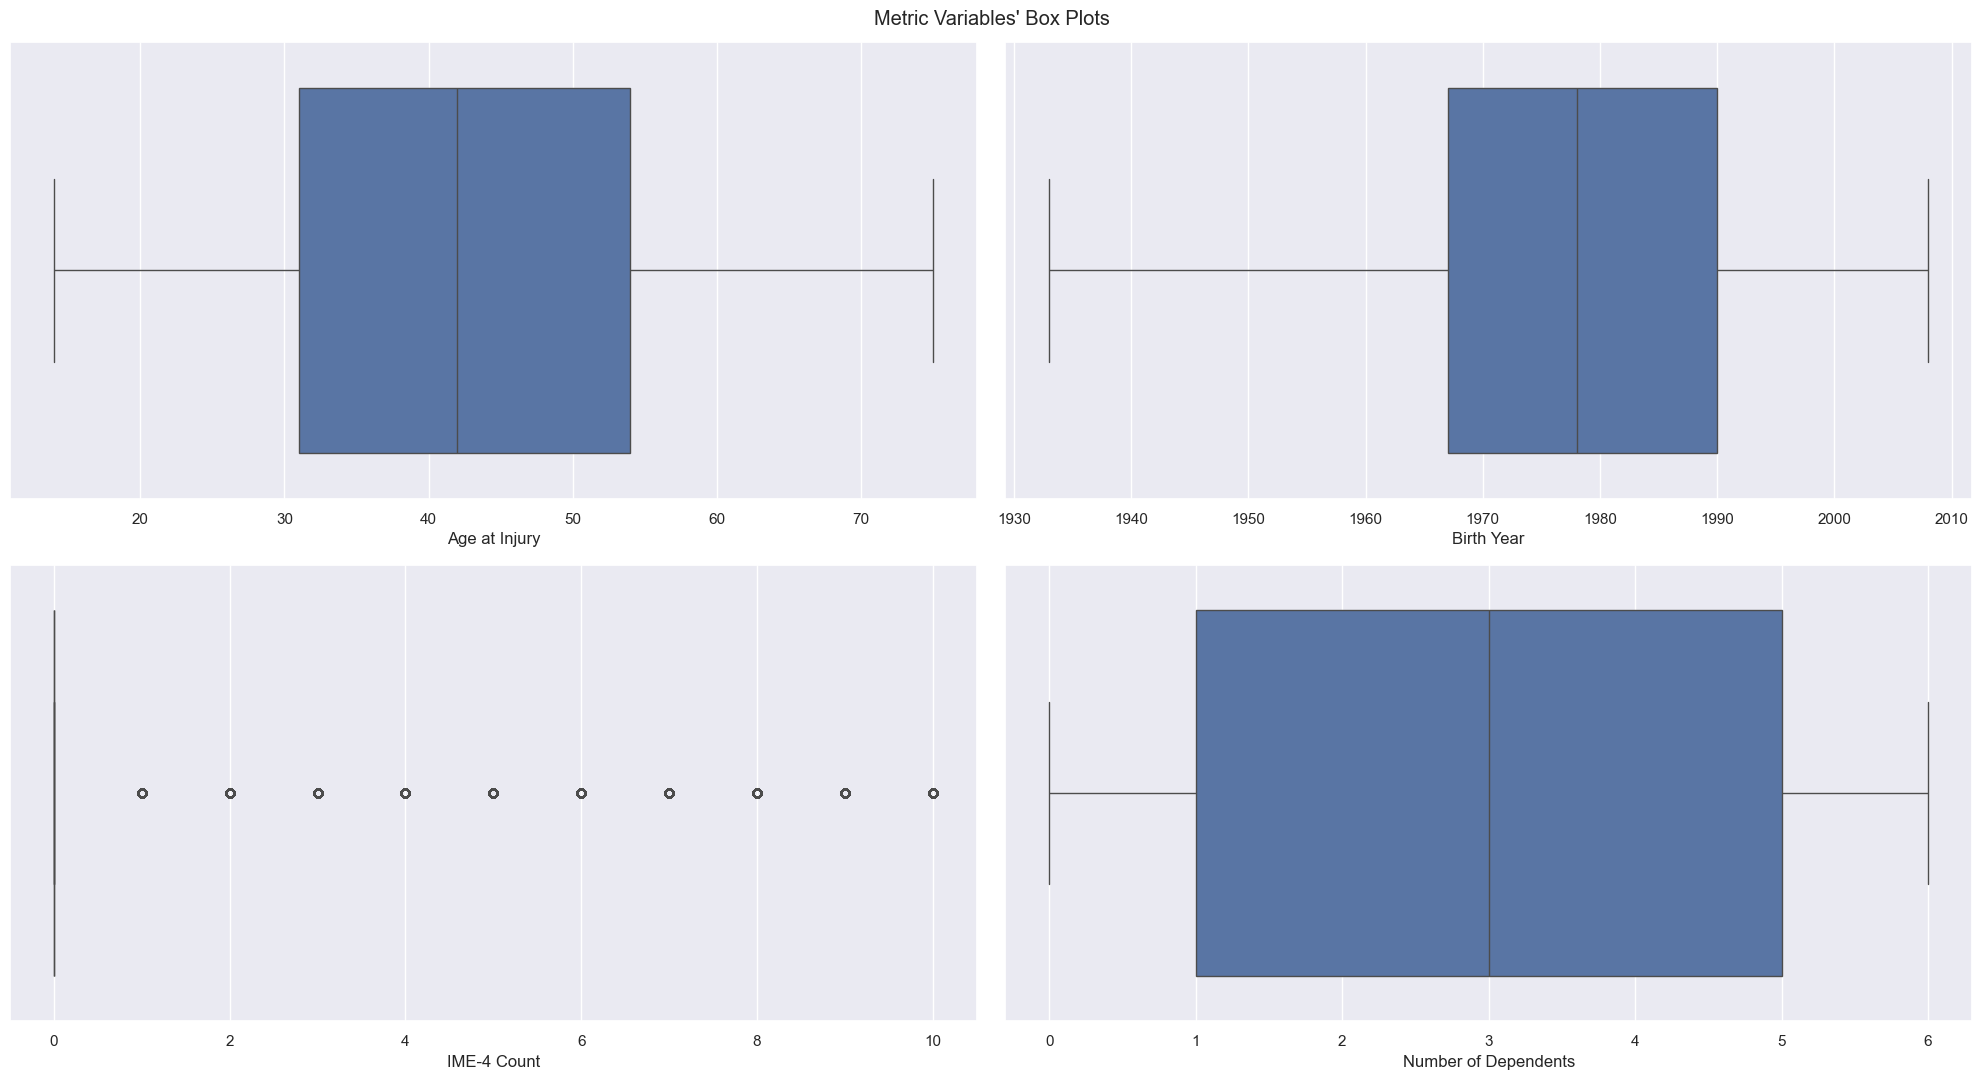

In [57]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set() ## Reset to darkgrid

sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram 
for ax, feat in zip(axes.flatten(), metric_cols): 
    sns.boxplot(x=train_data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Box Plots"

plt.suptitle(title)

plt.show()

## Data Preprocessing: Outliers for non-numeric columns.

#### Instead of visual inspection, we will use the value_counts() method to identify outliers in the non-numeric columns.

In [58]:
# 3. Data cleaning -Outliers

# Check for outliers in the non-numeric columns 

# Get dates out of non-metric columns for visualisation
non_metric_cols_no_dates = [col for col in non_metric_cols if col not in ['Accident Date', 'Assembly Date', 'C-2 Date']]

# Give the value counts for the non-numeric columns
for col in non_metric_cols_no_dates:
    print(train_data[col].value_counts(normalize=True, dropna=False))



Alternative Dispute Resolution
False    0.995389
True     0.004611
Name: proportion, dtype: float64
Attorney/Representative
False    0.692301
True     0.307699
Name: proportion, dtype: Float64
Carrier Name
STATE INSURANCE FUND            0.194268
POLICE, FIRE, SANITATION        0.038033
AMERICAN ZURICH INSURANCE CO    0.030507
CHARTER OAK FIRE INS CO         0.030011
INDEMNITY INS. OF N AMERICA     0.024971
                                  ...   
ARGYLE CENTRAL SCHOOL DIST      0.000002
PROVIDENCE WASHINGTON INS CO    0.000002
CITY OF COHOES                  0.000002
ASSURANCE COMPANY OF AMERICA    0.000002
INFINITY ASSURANCE INS. CO.     0.000002
Name: proportion, Length: 2026, dtype: float64
Carrier Type
1A. PRIVATE                                    0.496354
3A. SELF PUBLIC                                0.212417
2A. SIF                                        0.194268
4A. SELF PRIVATE                               0.092388
UNKNOWN                                        0.002881
5D.

#####  Alternnative Dispute resolution
* 99.5 % of the data is 'False'. We will drop this column since it barely has any True values.

In [59]:
# Alternnative Dispute resolution
"""
99.5 % of the data is 'False'. We will drop this column since it barely has any True values.
"""

# Drop the Alternative Dispute Resolution column
train_data.drop(columns=['Alternative Dispute Resolution'], inplace=True)
non_metric_cols.remove('Alternative Dispute Resolution')

#### Attorney/Representative is OK when it comes to outliers

In [60]:
# Attorney/Representative OK


#### We will analyze the correlation between Carrier Name and Carrier Type because we assume they represent the same thing in different ways.

In [61]:

# We will analyze the correlation between Carrier Name and Carrier Type because we assume they represent the same thing in different ways.
contingency_table = pd.crosstab(train_data['Carrier Type'], train_data['Carrier Name'])


chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)


Cramér's V: 0.9709146987348377


### As we can see, the correlation between Carrier Name and Carrier Type is very high. We will drop Carrier Name column.

In [62]:

# Drop the Carrier Name column
train_data.drop(columns=['Carrier Name'], inplace=True)
non_metric_cols.remove('Carrier Name')

### WCIO Nature of Injury Code, WCIO Part Of Body Code, WCIO Part Of Body Description and WCIO Part Of Body Code
* All the description columns can be dropped since they are just descriptions of the codes.
* Before dropping the columns, we will check that the codes are unique for each description (everywhere else than Industry Code since there mulitple codes can mean same descriptions)


In [63]:
# Check if the codes are unique for each description
print(train_data['WCIO Nature of Injury Code'].nunique() == train_data['WCIO Nature of Injury Description'].nunique())
# True so we are OK to drop without extra handling

print(train_data['WCIO Part Of Body Code'].nunique() == train_data['WCIO Part Of Body Description'].nunique())
# False so we need to handle this

# See amount of unique values in WCIO Part Of Body Description
print(train_data['WCIO Part Of Body Description'].nunique())

# See amount of unique values in WCIO Part Of Body Code
print(train_data['WCIO Part Of Body Code'].nunique())

# Find all unique pairs of WCIO Part Of Body Code and WCIO Part Of Body Description
# Make a copy of the data
train_data_copy = train_data.copy()
unique_pairs = train_data_copy[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

# See the codes that have the same code but different descriptions
print(unique_pairs['WCIO Part Of Body Description'].value_counts().sort_values(ascending=False))



True
False
55
58
WCIO Part Of Body Description
DISC                                                     2
SPINAL CORD                                              2
SOFT TISSUE                                              2
CHEST                                                    1
LOWER LEG                                                1
SHOULDER(S)                                              1
MULTIPLE HEAD INJURY                                     1
FINGER(S)                                                1
LUNGS                                                    1
EYE(S)                                                   1
ANKLE                                                    1
KNEE                                                     1
THUMB                                                    1
LOWER BACK AREA                                          1
ABDOMEN INCLUDING GROIN                                  1
HIP                                                      1
MULTIPLE 

#### We found that Description DISC, SPINAL CORD and SOFT TISSUE have same Descriptions for different codes. We Checked from metadata that these descriptions indeed have different codes. We are OK to drop this description columns.

In [64]:

print(train_data['WCIO Cause of Injury Code'].nunique() == train_data['WCIO Cause of Injury Description'].nunique())

# See amount of unique values in WCIO Part Of Body Description
print(train_data['WCIO Cause of Injury Code'].nunique())

# See amount of unique values in WCIO Part Of Body Code
print(train_data['WCIO Cause of Injury Description'].nunique())

# Find all unique pairs of WCIO Cause of Injury Code and WCIO Cause of Injury Description
# Make a copy of the data
train_data_copy = train_data.copy()
unique_pairs = train_data_copy[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

# See the codes that have the same code but different descriptions
print(unique_pairs['WCIO Cause of Injury Description'].value_counts().sort_values(ascending=False))


# Drop the description columns
train_data.drop(columns=['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], inplace=True)
non_metric_cols = [col for col in non_metric_cols if col not in ['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description']]



False
78
75
WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED              3
REPETITIVE MOTION                           2
ON ICE OR SNOW                              1
ABSORPTION, INGESTION OR INHALATION, NOC    1
CUT, PUNCTURE, SCRAPE, NOC                  1
                                           ..
MOLD                                        1
ABNORMAL AIR PRESSURE                       1
CRASH OF WATER VEHICLE                      1
MOVING PART OF MACHINE                      1
CRASH OF AIRPLANE                           1
Name: count, Length: 75, dtype: int64


### We found that Description OBJECT BEING LIFTED OR HANDLED and REPETITIVE MOTION have same Descriptions for different codes.
* We Chekced from metadata that these descriptions indeed have different codes. 
* For REPETITIVE MOTION, we didn't find any information about the code. We will assume that this is OK since all the other descriptions with non-unique codes were OK as well
* We are OK to drop this description columns.

In [65]:
# Check again the value counts for the non-numeric columns

non_metric_cols_no_dates = [col for col in non_metric_cols if col not in ['Accident Date', 'Assembly Date', 'C-2 Date']]
# Give the value counts for the non-numeric columns
for col in non_metric_cols_no_dates:
    print(train_data[col].value_counts(normalize=True, dropna=False))

Attorney/Representative
False    0.692301
True     0.307699
Name: proportion, dtype: Float64
Carrier Type
1A. PRIVATE                                    0.496354
3A. SELF PUBLIC                                0.212417
2A. SIF                                        0.194268
4A. SELF PRIVATE                               0.092388
UNKNOWN                                        0.002881
5D. SPECIAL FUND - UNKNOWN                     0.001681
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)    0.000005
5C. SPECIAL FUND - POI CARRIER WCB MENANDS     0.000005
Name: proportion, dtype: float64
County of Injury
SUFFOLK       0.105052
QUEENS        0.101017
KINGS         0.092341
NASSAU        0.075768
BRONX         0.068946
                ...   
WYOMING       0.001328
MONTGOMERY    0.001077
SCHOHARIE     0.000984
YATES         0.000695
HAMILTON      0.000234
Name: proportion, Length: 63, dtype: float64
COVID-19 Indicator
False    0.951281
True     0.048719
Name: proportion, dtype: float64
District N

### County of Injury, District Name, Medical Fee Region and ZIP Code
Metadata:
- ZIP Code is home address of the injured person.
- County of Injury is the name of NY county where the injury happened.
- District Name is name of WCB district office that oversees the area that the injury happened.
- Medical Fee Region is the approx. region where the medical treatment was given.


#### From Metadata we can assume that at least County of Injury and District Name essentially represent the same thing. (Same county of injury usually will have the same district office)
* We will check the correlations between these columns with Cramer's V.

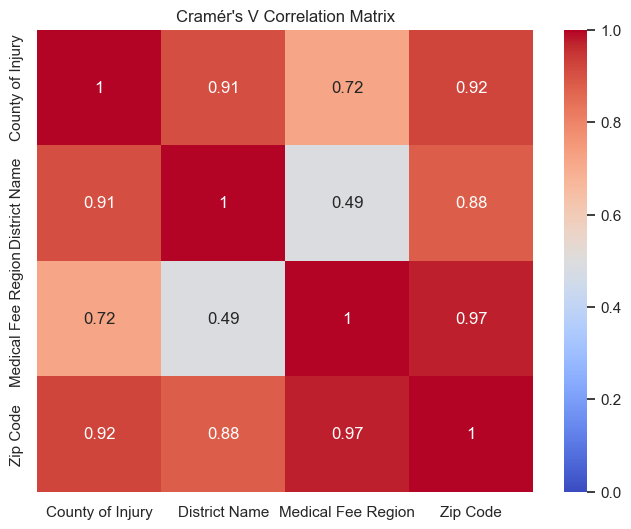

In [66]:
# County of Injury, District Name, Medical Fee Region and ZIP Code

"""
- ZIP Code is home address of the injured person.
- County of Injury is the name of NY county where the injury happened.
- District Name is name of WCB district office that oversees the area that the injury happened.
- Medical Fee Region is the approx. region where the medical treatment was given.

From Metadata we can assume that at least County of Injury and District Name essentially represent the same thing. (Same county of injury usually will have the same district office)

We will check the correlations between these columns with Cramer's V.
"""

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

columns = ["County of Injury", "District Name", "Medical Fee Region", "Zip Code"]

cramers_v_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))), 
                                index=columns, 
                                columns=columns)


for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(train_data[col1], train_data[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = 1 

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix")
plt.show()



* We can see from the cramer's v matrix that County of Injury has very high correlation with District Name and Zip Code.
* We can also see that Zip Code has very high correlation with County of Injury and District Name and Medical Fee Region.
* Only non-highly correlated columns are District Name and Medical Fee Region.

Conclusion:
* We will drop County of Injury and Zip Code columns.

In [67]:
# We will drop County of Injury and Zip Code columns.
train_data.drop(columns=['County of Injury', 'Zip Code'], inplace=True)
non_metric_cols = [col for col in non_metric_cols if col not in ['County of Injury', 'Zip Code']]

In [68]:
# Check again the value counts for the non-numeric columns

non_metric_cols_no_dates = [col for col in non_metric_cols if col not in ['Accident Date', 'Assembly Date', 'C-2 Date']]
# Give the value counts for the non-numeric columns
for col in non_metric_cols_no_dates:
    print(train_data[col].value_counts(normalize=True, dropna=False))

Attorney/Representative
False    0.692301
True     0.307699
Name: proportion, dtype: Float64
Carrier Type
1A. PRIVATE                                    0.496354
3A. SELF PUBLIC                                0.212417
2A. SIF                                        0.194268
4A. SELF PRIVATE                               0.092388
UNKNOWN                                        0.002881
5D. SPECIAL FUND - UNKNOWN                     0.001681
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)    0.000005
5C. SPECIAL FUND - POI CARRIER WCB MENANDS     0.000005
Name: proportion, dtype: float64
COVID-19 Indicator
False    0.951281
True     0.048719
Name: proportion, dtype: float64
District Name
NYC           0.470416
ALBANY        0.150929
HAUPPAUGE     0.105262
BUFFALO       0.079405
SYRACUSE      0.078171
ROCHESTER     0.070954
BINGHAMTON    0.038428
STATEWIDE     0.006434
Name: proportion, dtype: float64
Gender
M    0.582199
F    0.409529
U    0.008194
X    0.000078
Name: proportion, dtype: float6

#### Covid-19 Indicator

In [69]:
# Covid-19 Indicator

# Check the correlation between COVID-19 Indicator and WCIO Nature of Injury Code
contingency_table = pd.crosstab(train_data['COVID-19 Indicator'], train_data['WCIO Nature of Injury Code'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)

# We can see that the correlation between COVID-19 Indicator and WCIO Cause of Injury Code is very high. We will drop COVID-19 Indicator column.

# Drop the COVID-19 Indicator column
train_data.drop(columns=['COVID-19 Indicator'], inplace=True)
non_metric_cols.remove('COVID-19 Indicator')

Cramér's V: 0.9662068988035184


Covid-19 Indicator
* We can see that we have True only in 4.8% of the data. 
* We found that in WCIO Cause of Injury Code, code 83 is for COVID-19. That means that we could represent the COVID-19 Indicator with this column.
* We can see that the correlation between COVID-19 Indicator and WCIO Cause of Injury Code is very high. We will drop COVID-19 Indicator column.


#### Gender

In [70]:
# Check amount of data for rows with other than M and F
print(train_data['Gender'].value_counts())
train_data['Gender'].value_counts(normalize=True)

# Drop rows with other than M and F
train_data = train_data[train_data['Gender'].isin(['M', 'F'])]

print(len(train_data))

dropped = (1-(len(train_data)/original_length))*100
print(dropped, " % of the data is dropped.")

Gender
M    326547
F    229699
U      4596
X        44
Name: count, dtype: int64
556246
6.272421061854749  % of the data is dropped.


* Gender: We can see that we have only less than 0.1% of the data with other than M and F. We will drop these rows.

# About the target variable
- Our target varibale in first deliverable is Claim Injury Type
- For now WCB Decision and Agreement Reached are not consideres as features, but later in project we will use them as target variables.
    - We will exclude them from columns

#### See target value class imbalances

In [71]:
# Data Class Imbalances

# Check for class imbalances in the target value
print(train_data['Claim Injury Type'].value_counts(normalize=True))

# exclude the WCB Decision column and Agreement Reached column from the train data
train_data.drop(columns=['WCB Decision', 'Agreement Reached'], inplace=True)
non_metric_cols = [col for col in non_metric_cols if col not in ['WCB Decision', 'Agreement Reached']]


Claim Injury Type
2. NON-COMP        0.510175
4. TEMPORARY       0.257070
3. MED ONLY        0.121362
5. PPD SCH LOSS    0.084481
1. CANCELLED       0.018900
6. PPD NSL         0.007112
8. DEATH           0.000775
7. PTD             0.000126
Name: proportion, dtype: float64


### We can see that the target variable has some categories that only appear less than 1% of the data. Keep this in mind in model training. (Oversampling, undersampling or SMOTE probably needed)

In [72]:
# Let see all the columns that we have left
print(train_data.columns)
print(len(train_data.columns))

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'Birth Year', 'C-2 Date', 'Carrier Type',
       'Claim Injury Type', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents'],
      dtype='object')
17


# Feature engineering

## Creation of new features

### Time Until Injury Reported: Difference between Accident Date and Assembly Date

#### Very interesting feature that could potentially have an impact on the target variable, assuming that faster reported accidents might have a higher chance of being accepted

In [73]:
# Time Until Injury Reported: Difference between Accident Date and Assembly Date

# Calculate the difference between Accident Date and Assembly Date
train_data['Days Until Injury Reported'] = (train_data['Assembly Date'] - train_data['Accident Date']).dt.days

# Append the new column to the metric columns
metric_cols.append('Days Until Injury Reported')

# Check the dtype of the new column
print(train_data['Days Until Injury Reported'].dtype)


int64


#### See the distribution of the Days Until Injury Reported and handle possible outliers

Text(0.5, 1.0, 'Boxplot of the Days Until Injury Reported, before outlier handling')

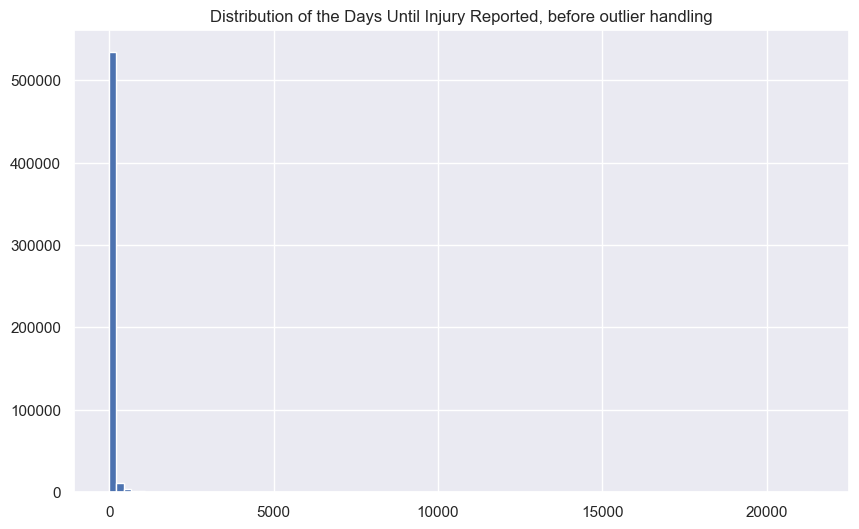

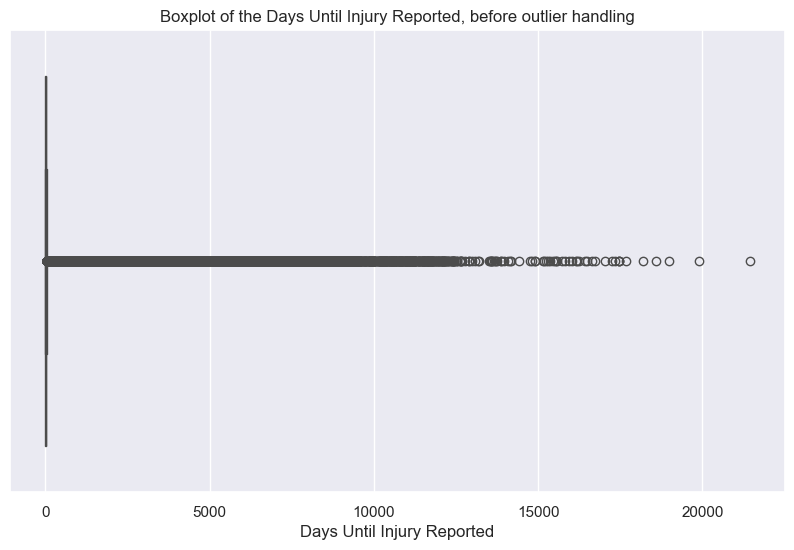

In [74]:
# See the distribution of the Days Until Injury Reported
plt.figure(figsize=(10, 6))
plt.hist(train_data['Days Until Injury Reported'], bins=100)
plt.title('Distribution of the Days Until Injury Reported, before outlier handling')

# Check for outliers in the Days Until Injury Reported column with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['Days Until Injury Reported'])
plt.title('Boxplot of the Days Until Injury Reported, before outlier handling')


In [75]:

# Check the descriptive statistics of the Days Until Injury Reported column
train_data['Days Until Injury Reported'].describe()

# Calculate the z-scores
z_scores = stats.zscore(train_data['Days Until Injury Reported'])

# Get the indexes of the outliers
outliers_days_until_injury_reported = train_data[(z_scores < -3) | (z_scores > 3)]

print(len(outliers_days_until_injury_reported))

# Check the range of the outliers Days Until Injury Reported
print(outliers_days_until_injury_reported['Days Until Injury Reported'].min())
print(outliers_days_until_injury_reported['Days Until Injury Reported'].max())


# Check the claim injury type for the outliers (to see that we are not deleting only one type of claim injury type)
print(outliers_days_until_injury_reported['Claim Injury Type'].value_counts())

# Drop the outliers
train_data.drop(outliers_days_until_injury_reported.index, inplace=True)

4351
1751
21439
Claim Injury Type
4. TEMPORARY       1972
2. NON-COMP        1530
1. CANCELLED        455
3. MED ONLY         257
5. PPD SCH LOSS     125
6. PPD NSL           11
7. PTD                1
Name: count, dtype: int64


#### See the histogram and boxplot again after outlier handling

Text(0.5, 1.0, 'Boxplot of the Days Until Injury Reported, before outlier handling')

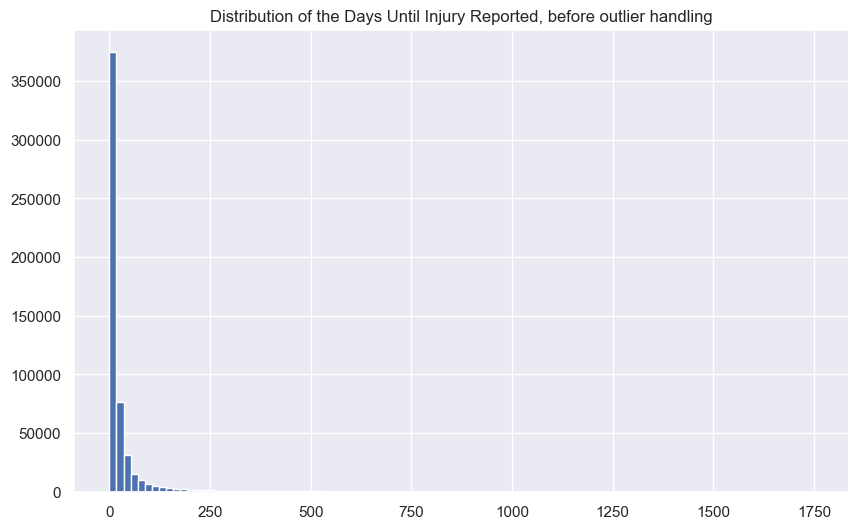

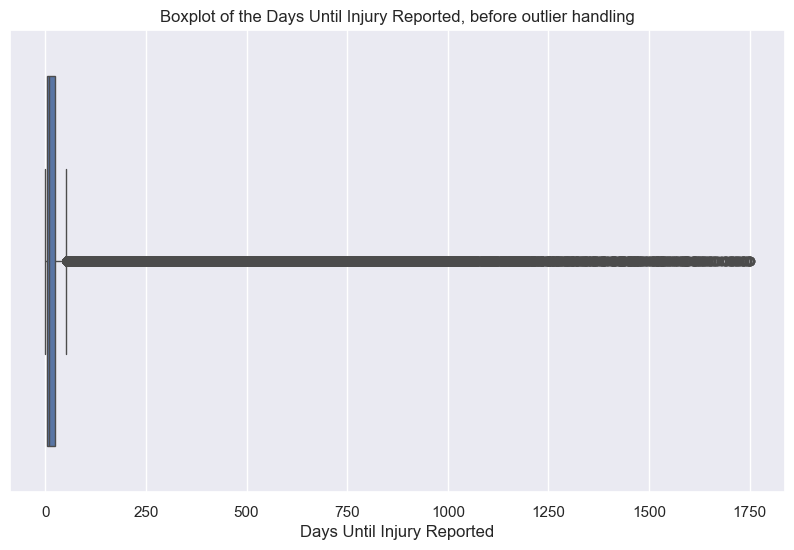

In [76]:
# See the distribution of the Days Until Injury Reported
plt.figure(figsize=(10, 6))
plt.hist(train_data['Days Until Injury Reported'], bins=100)
plt.title('Distribution of the Days Until Injury Reported, before outlier handling')

# Check for outliers in the Days Until Injury Reported column with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['Days Until Injury Reported'])
plt.title('Boxplot of the Days Until Injury Reported, before outlier handling')

Finally we check for the total amount of data that we dropped

In [77]:
# See the amount of data dropped
dropped = (1-(len(train_data)/original_length))*100
print(dropped, " % of the data was dropped.")

7.005565562596994  % of the data was dropped.


### After handling the missing values, outliers, other weird values as well as feature engineering, we have deleted 7% of the data. This is inside acceptable range (5%-10%)

# Feature Selection

# Bivariate Analysis (metric)

#### Since metadata says this about target variable "Numbering indicates severity", we can also handle Claim Injury Type as numerical value. 1 (cancelled) being the least sever and 8 (death) being the most severe.

#### Mapping this column to numeric value keeps the ordinal severity relationship for model training and now we can also assess the numerical correlations between target and predictors

In [78]:
# See the unique values in Claim Injury Type
print(train_data['Claim Injury Type'].unique())

# Creating a new column for the target variable as numeric one. NOTE: Later we map the original target varible to this one.

# Take the number from the Claim Injury Type column beginning
train_data['Claim Injury Type Numeric'] = train_data['Claim Injury Type'].str[0]

# Check the unique values in the new column 
print(train_data['Claim Injury Type Numeric'].unique())

# Make the new column integer
train_data['Claim Injury Type Numeric'] = train_data['Claim Injury Type Numeric'].astype(int)

# See the unique values in Claim Injury Type Numeric
print(train_data['Claim Injury Type Numeric'].unique())

# Add the new column to the metric columns
metric_cols.append('Claim Injury Type Numeric')


['2. NON-COMP' '4. TEMPORARY' '3. MED ONLY' '5. PPD SCH LOSS' '6. PPD NSL'
 '1. CANCELLED' '8. DEATH' '7. PTD']
['2' '4' '3' '5' '6' '1' '8' '7']
[2 4 3 5 6 1 8 7]


## Pearson's correlation matrix


['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Days Until Injury Reported', 'Claim Injury Type Numeric']


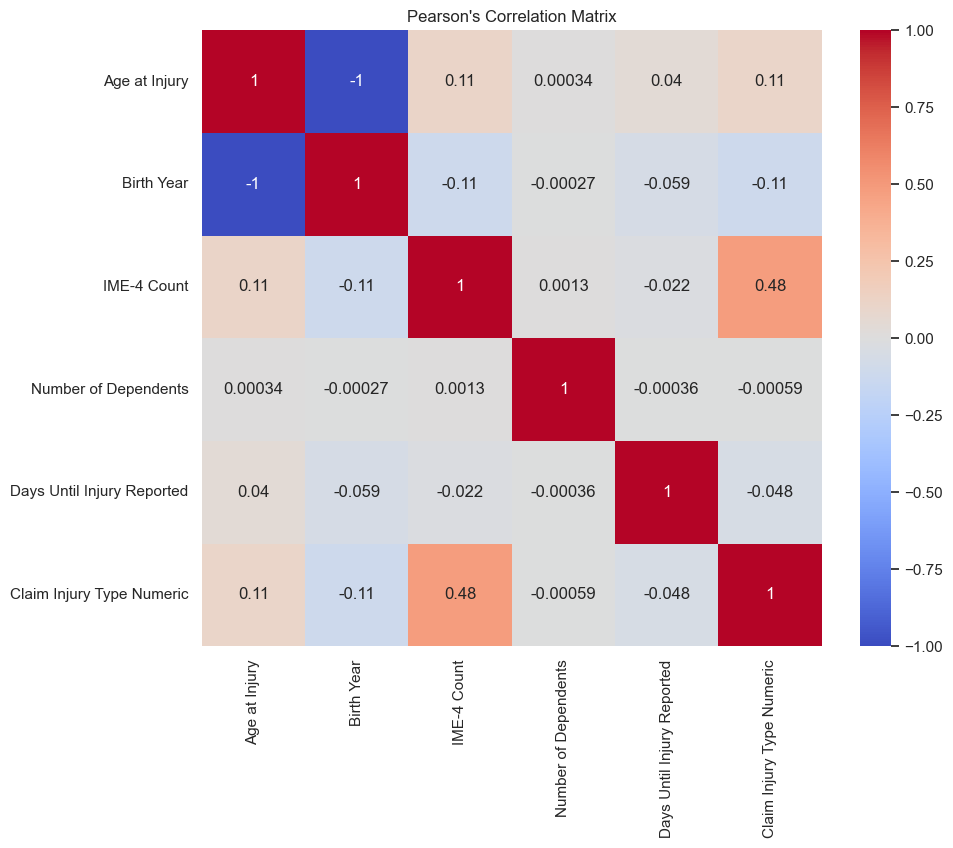

In [79]:
# Plot the Pearson's correlation matrix for the metric columns
print(metric_cols)

# Calculate the correlation matrix
corr = train_data[metric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson's Correlation Matrix")
plt.show()

#### After Pearson's correlation we see (it is quite obvious intuitivly) that birth year correlates perfectly with age at injury
- Drop Birth year column

In [80]:
# Drop Birth Year since it has very high correlation with Age at Injury
train_data.drop(columns=['Birth Year'], inplace=True)
metric_cols.remove('Birth Year')

## Pearson's is not enough. We need to check for non-linear relationships as well so we are also plotting Spearman's correlation matrix

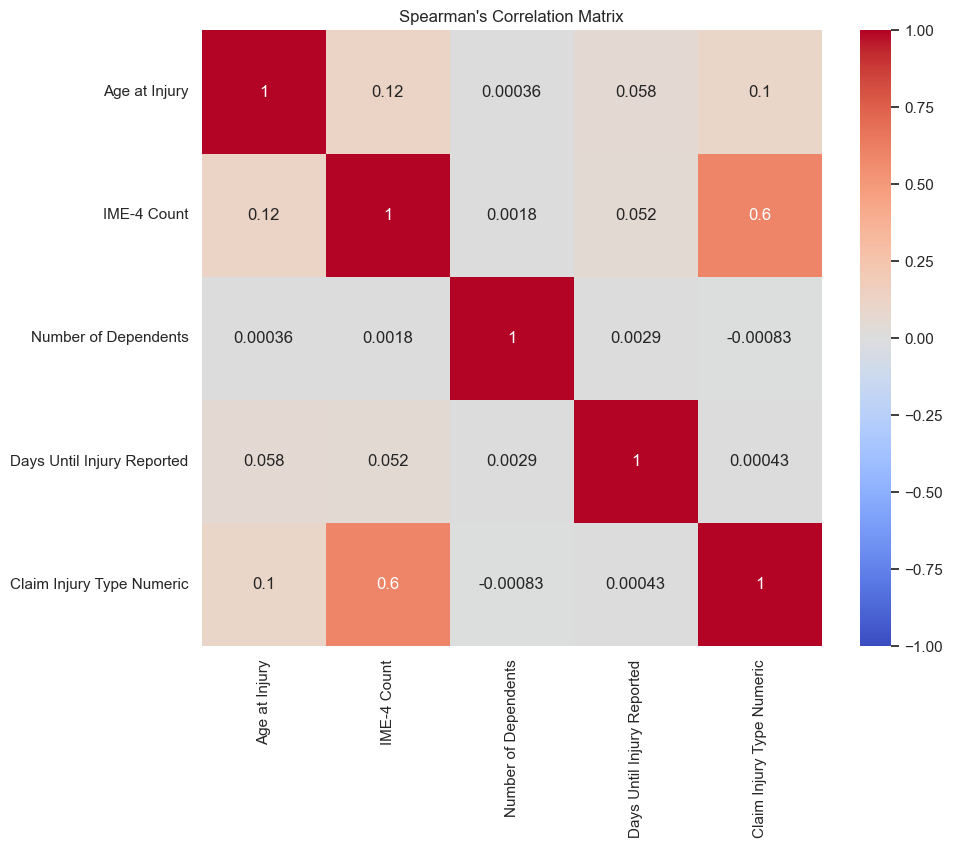

In [81]:
# Calculate the Spearman's correlation matrix for metric columns

# Calculate the correlation matrix
corr = train_data[metric_cols].corr(method='spearman')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman's Correlation Matrix")
plt.show()

## Conclusion for bivariate correlation anlysis on metric columns:
* Birth Year column was dropped since it correlated perfectly with Age at Injury (to avoid Redundancy)
* IME-4 count seems to have the most correlation with the target variable out of numerical predictor variables
* Number of dependents had low correlation with all the other predictor variabels and with target variable

# Non-metric variables analysis

In [82]:
# We saw that Claim Injury Type is not in the non-metric columns. We will move it there.
print(non_metric_cols)
non_metric_cols.append('Claim Injury Type')

['Accident Date', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'Carrier Type', 'District Name', 'Gender', 'Medical Fee Region', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']


#### We excluded datetype columns for phi-k and Cramer's V analysis since the datatype was not accepted by the phik_matrix -function and Carmer's V analysis function

In [83]:
# See the non-meetric columns that we have left
print(non_metric_cols)

# Create list of columns without dates
non_metric_cols_no_dates = [col for col in non_metric_cols if col not in ['Accident Date', 'Assembly Date', 'C-2 Date']]

data_non_metric_no_dates = train_data[non_metric_cols_no_dates]

['Accident Date', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'Carrier Type', 'District Name', 'Gender', 'Medical Fee Region', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Claim Injury Type']


Attorney/Representative       boolean
Carrier Type                   object
District Name                  object
Gender                         object
Medical Fee Region             object
Industry Code                   int64
WCIO Cause of Injury Code       int64
WCIO Nature of Injury Code      int64
WCIO Part Of Body Code          int64
Claim Injury Type              object
dtype: object


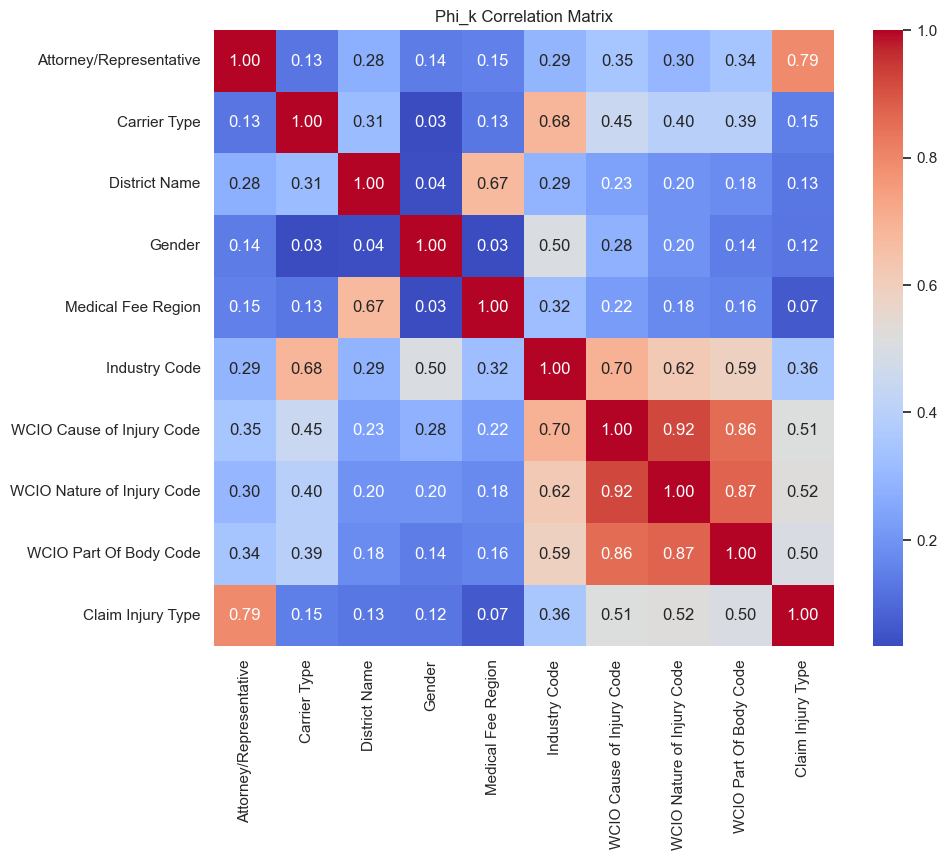

In [84]:
# Plot phi-k correlation matrix for non-metric columns without dates

# See data types of the non-metric columns
print(data_non_metric_no_dates.dtypes)

# Calculate the phi-k correlation matrix
phi_k_corr = data_non_metric_no_dates.phik_matrix(interval_cols=[])

# Plot the phi_k correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(phi_k_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Phi_k Correlation Matrix')
plt.show()

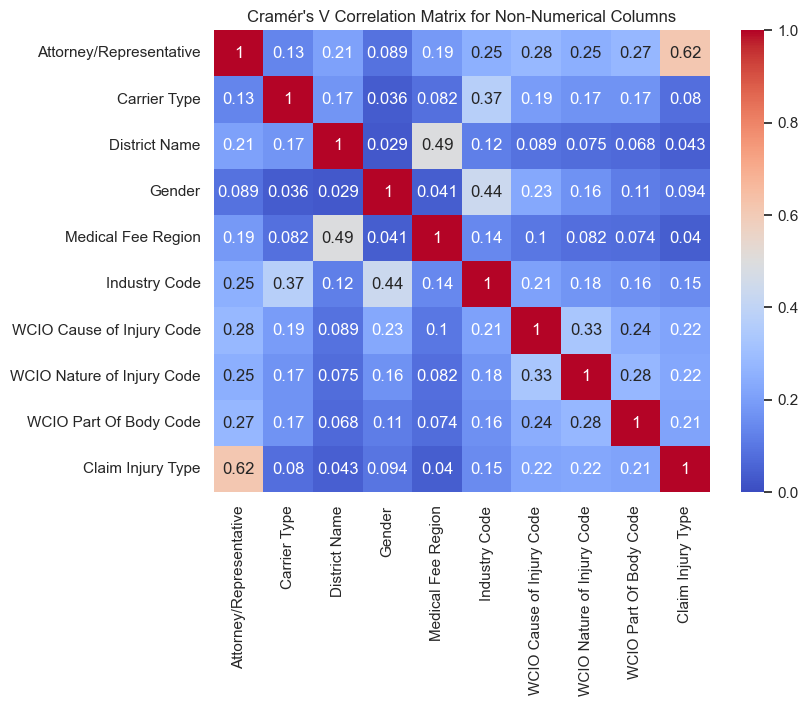

In [85]:
# Plot Cramer's V correlation matrix for non-metric columns without dates

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Function to calculate the correlation matrix using Cramér's V
def calculate_cramers_v_matrix(df):
    cols = df.columns
    n = len(cols)
    cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            if i <= j:  # Only calculate the upper triangle (symmetric matrix)
                cramers_v_value = cramers_v(df[col1], df[col2])
                cramers_v_matrix.iloc[i, j] = cramers_v_value
                cramers_v_matrix.iloc[j, i] = cramers_v_value
    
    return cramers_v_matrix


# Calculate the Cramér's V correlation matrix for the data
cramers_v_matrix = calculate_cramers_v_matrix(data_non_metric_no_dates)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix for Non-Numerical Columns")
plt.show()

### Conclusion on non-metric bivariate correlation analysis:
* Attorney/Representative correlates the most out of the non-numerical variables with target variable --> We will definitely keep this
* Medical Fee Region correlates very poorly with target variable (and it is also somewhat represented in District Code) so we decided to drop the column

In [86]:
# Drop the medical fee region column since it shows irrelevancy with the target variable

train_data.drop(columns=['Medical Fee Region'], inplace=True)
data_non_metric_no_dates.drop(columns=['Medical Fee Region'], inplace=True)

non_metric_cols.remove('Medical Fee Region')
non_metric_cols_no_dates.remove('Medical Fee Region')

/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_75315/3544734139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_metric_no_dates.drop(columns=['Medical Fee Region'], inplace=True)


In [87]:
# Check column names
print(list(train_data.columns))
print(non_metric_cols)

['Accident Date', 'Age at Injury', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'Carrier Type', 'Claim Injury Type', 'District Name', 'Gender', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents', 'Days Until Injury Reported', 'Claim Injury Type Numeric']
['Accident Date', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'Carrier Type', 'District Name', 'Gender', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Claim Injury Type']


# Summary of all correlations


* High correlations between target variable
    * Attorney/Representative correlates the most with target variable out of all non-numeric predictor variables
    * IME-4 count seems to have the most correlation with the target variable out of numerical predictor variables
* Redundancies
    * Birth Year column was dropped since it correlated perfectly with Age at Injury (to avoid Redundancy)
    * WCIO Cause of Injury Code, WCIO Nature of Injury Code and WCIO Part Of Body Code had high correlations between each other AND nice correlations between target variable.
        * We can consider droppig one or two of these to avoid redundancy
* Irrelevancies
    * Number of dependents had low correlation with all the other predictor variabels and with target variable
    * Medical Fee Region correlates very poorly with target variable (and it is also somewhat represented in District Code) so we decided to drop the column

#### We can now change the original target column to be the numerical representation of it. This will be beneficial in model fitting phase.

In [88]:
# Store original mapping in Claim Injury Type
# Create mapping of the all the unique values in the Claim Injury Type column in the train data
unique_claim_injury_type_train = train_data['Claim Injury Type'].unique()

# Get the number of unique values from the beginnig of the Claim Injury Type
unique_claim_injury_type_train_values = [x[0] for x in unique_claim_injury_type_train]

# Map unique_claim_injury_type_train_values to be type int
unique_claim_injury_type_train_values = list(map(int, unique_claim_injury_type_train_values))

print(unique_claim_injury_type_train)
print(unique_claim_injury_type_train_values)

#Create a dictionary for the mapping
claim_injury_type_mapping = dict(zip(unique_claim_injury_type_train_values, unique_claim_injury_type_train))

print(claim_injury_type_mapping)

['2. NON-COMP' '4. TEMPORARY' '3. MED ONLY' '5. PPD SCH LOSS' '6. PPD NSL'
 '1. CANCELLED' '8. DEATH' '7. PTD']
[2, 4, 3, 5, 6, 1, 8, 7]
{2: '2. NON-COMP', 4: '4. TEMPORARY', 3: '3. MED ONLY', 5: '5. PPD SCH LOSS', 6: '6. PPD NSL', 1: '1. CANCELLED', 8: '8. DEATH', 7: '7. PTD'}


In [89]:
# Drop the Claim Injury Type Numeric column from metric_cols since we have the original Claim Injury Type column
metric_cols.remove('Claim Injury Type Numeric')

# Drop the Claim Injury Type Numeric column from the train data
train_data.drop(columns=['Claim Injury Type Numeric'], inplace=True)

# Map the Claim Injury Type column according to mapping
train_data['Claim Injury Type'] = train_data['Claim Injury Type'].str[0].astype(int)

# See the unique values in Claim Injury Type
print(train_data['Claim Injury Type'].unique())

[2 4 3 5 6 1 8 7]


In [90]:
# See all test data columns
print(train_data.columns)

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'C-2 Date', 'Carrier Type',
       'Claim Injury Type', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents', 'Days Until Injury Reported'],
      dtype='object')


#### Now we will drop all the columns from test data, which were also dropped from training data

In [91]:
# See all columns the test_data has that the train_data doesn't have
print(set(test_data.columns) - set(train_data.columns))

# Drop the columns that the test_data has that the train_data doesn't have. 
for col in set(test_data.columns) - set(train_data.columns):
    test_data.drop(columns=[col], inplace=True)

# Check the columns that the train_data has that the test_data doesn't have
print(set(train_data.columns) - set(test_data.columns))

{'WCIO Nature of Injury Description', 'COVID-19 Indicator', 'First Hearing Date', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'Birth Year', 'Zip Code', 'Average Weekly Wage', 'County of Injury', 'WCIO Part Of Body Description', 'Alternative Dispute Resolution', 'Industry Code Description', 'C-3 Date', 'Carrier Name', 'OIICS Nature of Injury Description'}
{'Claim Injury Type', 'Days Until Injury Reported'}


### For columns left in test_data, we need to perform same operations as we did for train_data

In [92]:
# For columns left in test_data, we need to perform same operations as we did for train_data
print(test_data.columns)

# Column by column operations for test_data

# Accident Date
# Convert the Accident Date to datetime
test_data['Accident Date'] = pd.to_datetime(test_data['Accident Date'])

# Age at Injury
# Map to integer
test_data['Age at Injury'] = test_data['Age at Injury'].astype(int)

# Assembly Date
# Convert the Assembly Date to datetime
test_data['Assembly Date'] = pd.to_datetime(test_data['Assembly Date'])

# Attorney/Representative
# Map the Attorney/Representative to boolean
test_data['Attorney/Representative'] = test_data['Attorney/Representative'].map({'Y': True, 'N': False}).astype('boolean')

# C-2 Date
# Convert the C-2 Date to datetime
test_data['C-2 Date'] = pd.to_datetime(test_data['C-2 Date'])

# Carrier Type
# Nothing

# District Name
# Nothing

# Gender
# Nothing

# IME-4 Count
# Nothing



Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'C-2 Date', 'Carrier Type', 'District Name',
       'Gender', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents'],
      dtype='object')


In [93]:

# Industry Code
# Map to integer
test_data['Industry Code'] = test_data['Industry Code'].fillna(0)
test_data['Industry Code'] = test_data['Industry Code'].astype(int)

# WCIO Cause of Injury Code
# Map to integer
test_data['WCIO Cause of Injury Code'] = test_data['WCIO Cause of Injury Code'].fillna(0)
test_data['WCIO Cause of Injury Code'] = test_data['WCIO Cause of Injury Code'].astype(int)

# WCIO Nature of Injury Code
# Map to integer
test_data['WCIO Nature of Injury Code'] = test_data['WCIO Nature of Injury Code'].fillna(0)
test_data['WCIO Nature of Injury Code'] = test_data['WCIO Nature of Injury Code'].astype(int)

# WCIO Part Of Body Code
# Map to integer
test_data['WCIO Part Of Body Code'] = test_data['WCIO Part Of Body Code'].fillna(0)
test_data['WCIO Part Of Body Code'] = test_data['WCIO Part Of Body Code'].astype(int)


In [94]:

# Number of Dependents
# Map to float
test_data['Number of Dependents'] = test_data['Number of Dependents'].astype(float)

### Ensure that the test data columns have same type as train data columns

In [95]:
# Ensure that the test data columns have same type as train data columns

# Get columns in train_data as list
train_data_cols = list(train_data.columns)
print(train_data_cols)

# Check the data types of the columns in train_data
print(train_data.dtypes)

# Check the data types of the columns in test_data
print(test_data.dtypes)

['Accident Date', 'Age at Injury', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'Carrier Type', 'Claim Injury Type', 'District Name', 'Gender', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents', 'Days Until Injury Reported']
Accident Date                 datetime64[ns]
Age at Injury                          int64
Assembly Date                 datetime64[ns]
Attorney/Representative              boolean
C-2 Date                      datetime64[ns]
Carrier Type                          object
Claim Injury Type                      int64
District Name                         object
Gender                                object
IME-4 Count                          float64
Industry Code                          int64
WCIO Cause of Injury Code              int64
WCIO Nature of Injury Code             int64
WCIO Part Of Body Code                 int64
Number of Dependents                 float64

#### We see that the test data is missing Claim Injury Type column. This is OK since this is the column we are trying to predict.

## Handling of missing values in test data's Accident Date column
* We deleted the rows in the training data where Accident Date was missing
* We are not allowed to delete testing data (due to Kaggle), so same operation is not possible for testing data case
    * We decided to calculate median of the Days Until Injury Reported -variable (difference between accident date and assembly date) and impute missing values in testing data's accident date -column by substracting the median(training data median) of Days Until Injury Reported from the assembly date.
    * The resulting date approximates the accident date in testing data

In [96]:
# Fill missing values first in the test data in Accident Date

# Calculate the median of difference between Accident Date and Assembly Date in the train data
median_days_until_injury_reported = train_data['Days Until Injury Reported'].median()

# Fill missing values in Accident Date with assembly date minus median of days_until_injury_reported
test_data['Accident Date'].fillna(test_data['Assembly Date'] - pd.Timedelta(days=median_days_until_injury_reported), inplace=True)


/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_75315/3928073060.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Accident Date'].fillna(test_data['Assembly Date'] - pd.Timedelta(days=median_days_until_injury_reported), inplace=True)


### We also see that the test_data is missing Days Until Injury Reported that we created to the training data. We need to create this column for the test data as well, in the similar manner we did for the training data.

In [97]:
# We also see that the test_data is missing Days Until Injury Reported. We need to create this column for the test data as well.
test_data['Days Until Injury Reported'] = (test_data['Assembly Date'] - test_data['Accident Date']).dt.days

# See that now the only column missing from the test data is the Claim Injury Type column
print(set(train_data.columns) - set(test_data.columns))

{'Claim Injury Type'}


# Handle datatype conversion so that datatypes are acceptable for the model fitting
* Datetimes need to change to something else
* boolean to int (0 and 1)
* One-Hot Encoding or ordinal encoding for objects

#### For Carrier type, Gender and District Name, we did label encoding. Encoding translates string type labels to numeric ones.

In [98]:
# Get all columns with datatype object
object_cols = train_data.select_dtypes(include=['object']).columns.tolist()
print(object_cols)


# We need to create mapping for unique values in the object columns
# Find all unique values in Carrier Type and give them a unique number (starting from 1)

# Carrier Type
# Find all unique values in Carrier Type
unique_carrier_type = train_data['Carrier Type'].unique()
print(unique_carrier_type)

# Create a mapping for Carrier Type
carrier_type_mapping = {carrier_type: i+1 for i, carrier_type in enumerate(unique_carrier_type)}
print(carrier_type_mapping)

# For training and test data, map the Carrier Type column to the unique number and change the datatype to integer
train_data['Carrier Type'] = train_data['Carrier Type'].map(carrier_type_mapping)
print(train_data['Carrier Type'].unique())

['Carrier Type', 'District Name', 'Gender']
['1A. PRIVATE' '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC' 'UNKNOWN'
 '5D. SPECIAL FUND - UNKNOWN' '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
{'1A. PRIVATE': 1, '2A. SIF': 2, '4A. SELF PRIVATE': 3, '3A. SELF PUBLIC': 4, 'UNKNOWN': 5, '5D. SPECIAL FUND - UNKNOWN': 6, '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 7}
[1 2 3 4 5 6 7]


In [99]:
# Check the unqiue values in Carrier Type in test data
unique_carrier_type_test = test_data['Carrier Type'].unique()
print(unique_carrier_type_test)

# Find the values in test data that are not in train data
print(set(unique_carrier_type_test) - set(unique_carrier_type))

# For the unique values in test data that are not in train data, we will map them to one bigger than the biggest number in train data
for carrier_type in set(unique_carrier_type_test) - set(unique_carrier_type):
    carrier_type_mapping[carrier_type] = max(carrier_type_mapping.values()) + 1

print(carrier_type_mapping)

# Map the Carrier Type column in test data
test_data['Carrier Type'] = test_data['Carrier Type'].map(carrier_type_mapping)

['1A. PRIVATE' '3A. SELF PUBLIC' '4A. SELF PRIVATE' '2A. SIF' 'UNKNOWN'
 '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)']
{'5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'}
{'1A. PRIVATE': 1, '2A. SIF': 2, '4A. SELF PRIVATE': 3, '3A. SELF PUBLIC': 4, 'UNKNOWN': 5, '5D. SPECIAL FUND - UNKNOWN': 6, '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 7, '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 8}


In [100]:
#Gender mapping

# Get all unique values for gender in train data
unique_genders_train = train_data['Gender'].unique()
print(unique_genders_train)

# Get all unique values for gender in test data
unique_genders_test = test_data['Gender'].unique()
print(unique_genders_test)

# Create the mapping accoring to the unique values in test data
gender_mapping = {gender: i+1 for i, gender in enumerate(unique_genders_test)}
print(gender_mapping)

# Do the mapping for both train and test data and change the datatype to integer
train_data['Gender'] = train_data['Gender'].map(gender_mapping)
test_data['Gender'] = test_data['Gender'].map(gender_mapping)

print(train_data['Gender'].unique())
print(test_data['Gender'].unique())

['M' 'F']
['M' 'F' 'U' 'X']
{'M': 1, 'F': 2, 'U': 3, 'X': 4}
[1 2]
[1 2 3 4]


In [101]:
# District Name
# Find all unique values in District Name
unique_district_name_train  = train_data['District Name'].unique()
unique_district_name_test = test_data['District Name'].unique()

print(unique_district_name_train)
print(unique_district_name_test)

# Find all unique values in District Name from both train and test data
unique_district_name = np.unique(np.concatenate((unique_district_name_train, unique_district_name_test)))
print(unique_district_name)

# Create a mapping for District Name
district_name_mapping = {district_name: i+1 for i, district_name in enumerate(unique_district_name)}
print(district_name_mapping)

# For training and test data, map the District Name column to the unique number and change the datatype to integer
train_data['District Name'] = train_data['District Name'].map(district_name_mapping)
test_data['District Name'] = test_data['District Name'].map(district_name_mapping)

print(train_data['District Name'].unique())
print(test_data['District Name'].unique())

['SYRACUSE' 'ROCHESTER' 'ALBANY' 'HAUPPAUGE' 'NYC' 'BUFFALO' 'BINGHAMTON'
 'STATEWIDE']
['NYC' 'ALBANY' 'BUFFALO' 'SYRACUSE' 'BINGHAMTON' 'HAUPPAUGE' 'ROCHESTER'
 'STATEWIDE']
['ALBANY' 'BINGHAMTON' 'BUFFALO' 'HAUPPAUGE' 'NYC' 'ROCHESTER' 'STATEWIDE'
 'SYRACUSE']
{'ALBANY': 1, 'BINGHAMTON': 2, 'BUFFALO': 3, 'HAUPPAUGE': 4, 'NYC': 5, 'ROCHESTER': 6, 'STATEWIDE': 7, 'SYRACUSE': 8}
[8 6 1 4 5 3 2 7]
[5 1 3 8 2 4 6 7]


#### For boolean type columns, Falses and Trues were mapped to 0s and 1s.

In [102]:

# Get all boolean columns
boolean_cols = train_data.select_dtypes(include=['boolean']).columns.tolist()
print(boolean_cols)

print(train_data['Attorney/Representative'].unique())
print(test_data['Attorney/Representative'].unique())

# Turn the boolean 'Attorney/Representative' to integer
train_data['Attorney/Representative'] = train_data['Attorney/Representative'].astype(int)
test_data['Attorney/Representative'] = test_data['Attorney/Representative'].astype(int)

print(train_data['Attorney/Representative'].unique())
print(test_data['Attorney/Representative'].unique())

['Attorney/Representative']
<BooleanArray>
[False, True]
Length: 2, dtype: boolean
<BooleanArray>
[False, True]
Length: 2, dtype: boolean
[0 1]
[0 1]


## Handle missing values in Test datas date columns (Accident Date already handled)

#### For C-2 Date missing values were handled similarly to training data.

In [103]:
# Check for missing values in the datetime objects in the test data
print(test_data[['Accident Date', 'Assembly Date', 'C-2 Date']].isnull().sum())

# Accident Dates Handled already
# Fill missing values in C-2 Date with Accident Date + 10 days (10 days was the median difference between Accident Date and C-2 Date in training data)
test_data['C-2 Date'].fillna(test_data['Accident Date'] + pd.Timedelta(days=10), inplace=True)

# Check for missing values in the datetime objects in the test data
print(test_data[['Accident Date', 'Assembly Date', 'C-2 Date']].isnull().sum())

Accident Date       0
Assembly Date       0
C-2 Date         9134
dtype: int64
Accident Date    0
Assembly Date    0
C-2 Date         0
dtype: int64


/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_75315/249994355.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['C-2 Date'].fillna(test_data['Accident Date'] + pd.Timedelta(days=10), inplace=True)


## Conversion of date type variables to numeric variables in training, and testing data

* This conversion was mandatory so that we can use datetype columns for model training
* For all the datetime-type columns left, we calculated the difference between today and the date in the column and imouted the difference to the column

In [104]:
# Get all datetime columns
datetime_cols = train_data.select_dtypes(include=['datetime']).columns.tolist()
print(datetime_cols)

# Create this day as pd.datetime
today = pd.to_datetime('today')


# Update the original columns with the number of days from today
for col in ['Accident Date', 'Assembly Date', 'C-2 Date']:
    train_data[col] = (today - train_data[col]).dt.days
# Display the updated DataFrame and statistics
print(train_data[['Accident Date', 'Assembly Date', 'C-2 Date']])
print(train_data[['Accident Date', 'Assembly Date', 'C-2 Date']].describe())


['Accident Date', 'Assembly Date', 'C-2 Date']
                  Accident Date  Assembly Date  C-2 Date
Claim Identifier                                        
5393875                    1779           1777      1778
5393091                    1901           1777      1777
5393889                    1803           1777      1777
5393887                    1779           1777      1778
5393863                    1783           1777      1778
...                         ...            ...       ...
6165265                     699            683       683
6165285                     698            682       682
6165506                     700            682       682
6165339                     699            682       682
6165075                     700            682       682

[551895 rows x 3 columns]
       Accident Date  Assembly Date       C-2 Date
count  551895.000000  551895.000000  551895.000000
mean     1243.881202    1209.716361    1205.159237
std       329.335867     314.730

In [105]:
# Do the same for the test data

# Find the most recent dates for each column in train_data and test_data
end_dates_test = {col: test_data[col].max() for col in ['Accident Date', 'Assembly Date', 'C-2 Date']}

print("Test Data End Dates:", end_dates_test)

# Update the original columns with the number of days from the end date for test_data
for col in ['Accident Date', 'Assembly Date', 'C-2 Date']:
    test_data[col] = (today - test_data[col]).dt.days

print("\nUpdated Test Data:")
print(test_data[['Accident Date', 'Assembly Date', 'C-2 Date']])
print("\nTest Data Statistics:")
print(test_data[['Accident Date', 'Assembly Date', 'C-2 Date']].describe())

Test Data End Dates: {'Accident Date': Timestamp('2024-06-04 00:00:00'), 'Assembly Date': Timestamp('2024-06-05 00:00:00'), 'C-2 Date': Timestamp('2024-06-14 00:00:00')}

Updated Test Data:
                  Accident Date  Assembly Date  C-2 Date
Claim Identifier                                        
6165911                     689            680       680
6166141                     723            680       680
6165907                     687            680       682
6166047                     685            680       680
6166102                     693            680       682
...                         ...            ...       ...
6553137                    4444            160      4403
6553119                     174            160       164
6553542                     190            160       180
6553455                     262            160       252
6553594                     170            160       160

[387975 rows x 3 columns]

Test Data Statistics:
       Accident Dat

In [106]:
# See all datatypes again
print(train_data.dtypes)
print(test_data.dtypes)

Accident Date                   int64
Age at Injury                   int64
Assembly Date                   int64
Attorney/Representative         int64
C-2 Date                        int64
Carrier Type                    int64
Claim Injury Type               int64
District Name                   int64
Gender                          int64
IME-4 Count                   float64
Industry Code                   int64
WCIO Cause of Injury Code       int64
WCIO Nature of Injury Code      int64
WCIO Part Of Body Code          int64
Number of Dependents          float64
Days Until Injury Reported      int64
dtype: object
Accident Date                   int64
Age at Injury                   int64
Assembly Date                   int64
Attorney/Representative         int64
C-2 Date                        int64
Carrier Type                    int64
District Name                   int64
Gender                          int64
IME-4 Count                   float64
Industry Code                   int6

# Handling of missing values left in the test data

In [107]:
# Check for missing values in the test data
print(((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False))


IME-4 Count                   90.914621
Accident Date                  0.000000
Age at Injury                  0.000000
Assembly Date                  0.000000
Attorney/Representative        0.000000
C-2 Date                       0.000000
Carrier Type                   0.000000
District Name                  0.000000
Gender                         0.000000
Industry Code                  0.000000
WCIO Cause of Injury Code      0.000000
WCIO Nature of Injury Code     0.000000
WCIO Part Of Body Code         0.000000
Number of Dependents           0.000000
Days Until Injury Reported     0.000000
dtype: float64


#### IME-4 Count
* Missing values handled the same way as with trainig data

In [108]:
# Handle missing values in IME-4 Count the same way as in train data
test_data['IME-4 Count'] = test_data['IME-4 Count'].fillna(0)

# Check for missing values in the test data
print(((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False))

Accident Date                 0.0
Age at Injury                 0.0
Assembly Date                 0.0
Attorney/Representative       0.0
C-2 Date                      0.0
Carrier Type                  0.0
District Name                 0.0
Gender                        0.0
IME-4 Count                   0.0
Industry Code                 0.0
WCIO Cause of Injury Code     0.0
WCIO Nature of Injury Code    0.0
WCIO Part Of Body Code        0.0
Number of Dependents          0.0
Days Until Injury Reported    0.0
dtype: float64


# Variable Scaling (Normalization/Standardization)

In [109]:
# See min-max values for the metric columns
print(train_data[metric_cols].min())
print(train_data[metric_cols].max())

Age at Injury                 14.0
IME-4 Count                    0.0
Number of Dependents           0.0
Days Until Injury Reported     0.0
dtype: float64
Age at Injury                   75.0
IME-4 Count                     10.0
Number of Dependents             6.0
Days Until Injury Reported    1750.0
dtype: float64


#### There is a quite big range in Days Until Injury Reported, so we will use z-score standardization for scaling. z-score standardization is less sensitive to outliers.

In [110]:
print(metric_cols)

# Also now the date columns are in the metric columns since they were transformer to days from today (integer)
metric_cols.append('Accident Date')
metric_cols.append('Assembly Date')
metric_cols.append('C-2 Date')

non_metric_cols.remove('Accident Date')
non_metric_cols.remove('Assembly Date')
non_metric_cols.remove('C-2 Date')

print(metric_cols)
print(non_metric_cols)


['Age at Injury', 'IME-4 Count', 'Number of Dependents', 'Days Until Injury Reported']
['Age at Injury', 'IME-4 Count', 'Number of Dependents', 'Days Until Injury Reported', 'Accident Date', 'Assembly Date', 'C-2 Date']
['Attorney/Representative', 'Carrier Type', 'District Name', 'Gender', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Claim Injury Type']


In [111]:
# Standardize the metric columns with z-score normalization

# Create copy of non_standardized data for future
train_data_non_standardized = train_data.copy()
test_data_non_standardized = test_data.copy()

# Initialize the StandardScaler
scaler = StandardScaler()
scaler.fit(train_data[metric_cols])

# Scale the metric columns in both train and test data
train_data[metric_cols] = scaler.transform(train_data[metric_cols])
test_data[metric_cols] = scaler.transform(test_data[metric_cols])

# Check the min-max values for the metric columns after standardization
print(train_data[metric_cols].min())
print(train_data[metric_cols].max())


Age at Injury                -2.096012
IME-4 Count                  -0.418711
Number of Dependents         -1.502445
Days Until Injury Reported   -0.365128
Accident Date                -1.703069
Assembly Date                -1.676725
C-2 Date                     -3.285764
dtype: float64
Age at Injury                  2.415912
IME-4 Count                    5.886377
Number of Dependents           1.496079
Days Until Injury Reported    18.337557
Accident Date                  6.886954
Assembly Date                  1.802443
C-2 Date                       7.002375
dtype: float64


In [112]:
# See the datatypes one more time
print(train_data.dtypes)
print(test_data.dtypes)

Accident Date                 float64
Age at Injury                 float64
Assembly Date                 float64
Attorney/Representative         int64
C-2 Date                      float64
Carrier Type                    int64
Claim Injury Type               int64
District Name                   int64
Gender                          int64
IME-4 Count                   float64
Industry Code                   int64
WCIO Cause of Injury Code       int64
WCIO Nature of Injury Code      int64
WCIO Part Of Body Code          int64
Number of Dependents          float64
Days Until Injury Reported    float64
dtype: object
Accident Date                 float64
Age at Injury                 float64
Assembly Date                 float64
Attorney/Representative         int64
C-2 Date                      float64
Carrier Type                    int64
District Name                   int64
Gender                          int64
IME-4 Count                   float64
Industry Code                   int6

In [113]:
# See that there are no missing values in the test or train data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))

print(((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False))

Accident Date                 0.0
Age at Injury                 0.0
Assembly Date                 0.0
Attorney/Representative       0.0
C-2 Date                      0.0
Carrier Type                  0.0
Claim Injury Type             0.0
District Name                 0.0
Gender                        0.0
IME-4 Count                   0.0
Industry Code                 0.0
WCIO Cause of Injury Code     0.0
WCIO Nature of Injury Code    0.0
WCIO Part Of Body Code        0.0
Number of Dependents          0.0
Days Until Injury Reported    0.0
dtype: float64
Accident Date                 0.0
Age at Injury                 0.0
Assembly Date                 0.0
Attorney/Representative       0.0
C-2 Date                      0.0
Carrier Type                  0.0
District Name                 0.0
Gender                        0.0
IME-4 Count                   0.0
Industry Code                 0.0
WCIO Cause of Injury Code     0.0
WCIO Nature of Injury Code    0.0
WCIO Part Of Body Code        0.0

# Model training, selection and assessment

### Logistic Regression with RFE

In [ ]:
train_data_log = train_data.copy()
test_data_log = test_data.copy()
# Sclaing also the non-metric columns with StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
scaler.fit(train_data_log[non_metric_cols[:-1]])

# Scale the non metric columns in both train and test data
train_data_log[non_metric_cols[:-1]] = scaler.transform(train_data_log[non_metric_cols[:-1]])
test_data_log[non_metric_cols[:-1]] = scaler.transform(test_data_log[non_metric_cols[:-1]])

In [ ]:
# See the datatypes one more time
print(train_data_log.dtypes)
print(test_data_log.dtypes)

print(train_data_log['Claim Injury Type'].unique())

Accident Date                 float64
Age at Injury                 float64
Assembly Date                 float64
Attorney/Representative       float64
C-2 Date                      float64
Carrier Type                  float64
Claim Injury Type               int64
District Name                 float64
Gender                        float64
IME-4 Count                   float64
Industry Code                 float64
WCIO Cause of Injury Code     float64
WCIO Nature of Injury Code    float64
WCIO Part Of Body Code        float64
Number of Dependents          float64
Days Until Injury Reported    float64
dtype: object
Accident Date                 float64
Age at Injury                 float64
Assembly Date                 float64
Attorney/Representative       float64
C-2 Date                      float64
Carrier Type                  float64
District Name                 float64
Gender                        float64
IME-4 Count                   float64
Industry Code                 float6

In [ ]:
warnings.filterwarnings('ignore')

#Define the independant variables (as data) and the target variable
data = train_data_log.drop(["Claim Injury Type"], axis=1)
target = train_data_log["Claim Injury Type"]

# Split the dataset in train and validation data
X_train, X_val, y_train, y_val = train_test_split(data, 
                                                  target, 
                                                  test_size = 0.2, 
                                                  random_state=5, 
                                                  stratify = target)

# Convert pandas Series to numpy arrays
y_train_discrete = y_train.values
y_val_discrete = y_val.values


We use RFE with Logistic Regression in order to get the Optimum number of features, which should lead to the best results with our models

In [ ]:
# RFE with Logistic Regression

#no of features
nof_list=np.arange(1,train_data_log.shape[1])           
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []
optimal_selected_features = []

for n in range(len(nof_list)):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train_discrete)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train_discrete)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train_discrete)
    train_score_list.append(train_score)
    print(f"Train score with {nof_list[n]} features: {train_score:.4f}")
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val_discrete)
    val_score_list.append(val_score)
    print(f"Validation score with {nof_list[n]} features: {val_score:.4f}")

    # Print the selected features for the current number of features
    selected_features = X_train.columns[rfe.support_]
    print(f"Selected features with {nof_list[n]} features: {list(selected_features)}")

    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
        optimal_selected_features = selected_features

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Selected features for the optimum model: {list(optimal_selected_features)}")

Train score with 1 features: 0.5114
Validation score with 1 features: 0.5114
Selected features with 1 features: ['Assembly Date']
Train score with 2 features: 0.5170
Validation score with 2 features: 0.5171
Selected features with 2 features: ['Assembly Date', 'C-2 Date']
Train score with 3 features: 0.6288
Validation score with 3 features: 0.6257
Selected features with 3 features: ['Assembly Date', 'C-2 Date', 'IME-4 Count']
Train score with 4 features: 0.6333
Validation score with 4 features: 0.6304
Selected features with 4 features: ['Assembly Date', 'Attorney/Representative', 'C-2 Date', 'IME-4 Count']
Train score with 5 features: 0.6376
Validation score with 5 features: 0.6342
Selected features with 5 features: ['Accident Date', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'IME-4 Count']
Train score with 6 features: 0.6431
Validation score with 6 features: 0.6406
Selected features with 6 features: ['Accident Date', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 

The optimum number of features is 14, including the following features

In [ ]:
optimal_selected_features

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'C-2 Date', 'Carrier Type', 'District Name',
       'Gender', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Days Until Injury Reported'],
      dtype='object')

In [ ]:
#NOTE: Commented out the experimentations with the features since they didn't increase the performance of the model.

# We noticed that during the addition of WCIO Nature of Injury Code, WCIO Cause of Injury Code and WCIO Part Of Body Code, the model's performance didn't increase at all.
# These features also had high correlation with each other. We will drop two of these. I think we just added redundancy to the model with all of these features used.

# We will keep Part of Body Code since it had the highest correlation with the target variable.

# NOT DONE, WORSE f1 SCORE IN KAGGLE Drop the WCIO Nature of Injury Code and WCIO Cause of Injury Code columns
# optimal_selected_features = optimal_selected_features.drop(['WCIO Nature of Injury Code', 'WCIO Cause of Injury Code'])

# We noticed that these features were selected to the opimal selected features list. They had quite low correlation with the target variable.
# Gender
# Carrier type 
# District Name

# NOT DONE, WORSE f1 SCORE IN KAGGLE. In RFE, adding of Gender made validation score to decrease. We will drop this feature.
# optimal_selected_features = optimal_selected_features.drop('Gender')

#  NOT DONE, WORSE f1 SCORE IN KAGGLE. In RFE adding of District Name made validation score to decrease. We will drop this feature.
# optimal_selected_features = optimal_selected_features.drop('District Name')

# In RFE adding of Carrier Type made validation score to increase. We will keep this feature.

print(f"Selected features for the optimum model: {list(optimal_selected_features)}")

Selected features for the optimum model: ['Accident Date', 'Age at Injury', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'Carrier Type', 'District Name', 'Gender', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Days Until Injury Reported']


In [ ]:
#Train the model with the optimal features and check for accuracy, precision and F1 score
X_train_optimal = X_train[optimal_selected_features]
X_val_optimal = X_val[optimal_selected_features]

log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

log_model.fit(X_train_optimal, y_train_discrete)

y_pred = log_model.predict(X_val_optimal)

f1_macro = f1_score(y_val_discrete, y_pred, average='macro')
accuracy = accuracy_score(y_val_discrete, y_pred)
precision_macro = precision_score(y_val_discrete, y_pred, average='macro')

print("Macro F1_Score:", f1_macro)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision_macro)

Macro F1_Score: 0.2484427898965725
Accuracy Score: 0.6457206533851548
Precision Score: 0.322965334539043


We use the metrics Macro F1_Score, Accuracy and Precision since they complement each other for an extensive insight of the model functionality, considering multiple different evaluation aspects

In [ ]:
# Train the model with all of the train data

# Convert pandas Series to numpy arrays
y_train_array = target.values

y_train_discrete = y_train_array

X_train_optimal = data[optimal_selected_features]

log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

log_model.fit(X_train_optimal, y_train_discrete)
log_model.score(X_train_optimal, y_train_discrete)

0.6478859203290481

In [ ]:
#Get predictions for test data
new_test_data = test_data_log[optimal_selected_features]

y_test_pred = log_model.predict(new_test_data)

# Convert the predictions to list of integers
y_test_pred = [int(pred) for pred in y_test_pred]

# See are unique values in the predictions
unique_values = np.unique(y_test_pred)
print(unique_values)

# Format the predictions according to the required label format
print(y_test_pred)
claim_injury_type_mapping

# Convert numerical predictions to the required string format using label mapping
formatted_predictions = [claim_injury_type_mapping[pred] for pred in y_test_pred]

# Create the submission DataFrame
submission = pd.DataFrame({
    "Claim Identifier": test_data.index,
    "Claim Injury Type": formatted_predictions
})

submission.head()

# # Save to CSV in the required format
submission.to_csv("model2.csv", index=False)

[1 2 3 4 5 8]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 5, 2, 2, 4, 1, 2, 4, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4

BEFORE SCALING NON METRIC FEATURES <br>
<br>
Optimum number of features: 4 <br>
Train score with 4 features: 0.6381<br>
Validation score with 4 features: 0.6346<br>
Selected features for the optimum model: ['Attorney/Representative', 'Gender', 'IME-4 Count', 'Industry Code']<br>
<br>
Macro F1_Score: 0.20622086239626658 <br>
Accuracy Score: 0.6346406472245626 <br>
Precision Score: 0.2049266802990653 

AFTER SCALING NON METRIC FEATURES <br>
<br>
Optimum number of features: 14 <br>
Train score with 14 features: 0.6486  <br>
Validation score with 14 features: 0.6457 <br>
Selected features for the optimum model: ['Accident Date', 'Age at Injury', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'Carrier Type', 'District Name', 'Gender', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Days Until Injury Reported']<br>
<br>
Macro F1_Score: 0.2484427898965725<br>
Accuracy Score: 0.6457206533851548<br>
Precision Score: 0.322965334539043<br>


### KNN Classifier with PCA to reduce dimensionality of data.
* Normal KNN, it took so much time that for training, data was sampled from training data in the beginning. Later more data was added to training
* Approximation of NN calculation was used so that the calculation would be faster
    * Annoy library (Approximate Nearest Neighbors Oh Yeah) was used to get the approximation of the NN
        * Annoy algorithm builds multiple trees for fast approximate neighbor search. A higher number of trees increases accuracy but slows down building of the tree.


Evaluating k values in range: 2-10


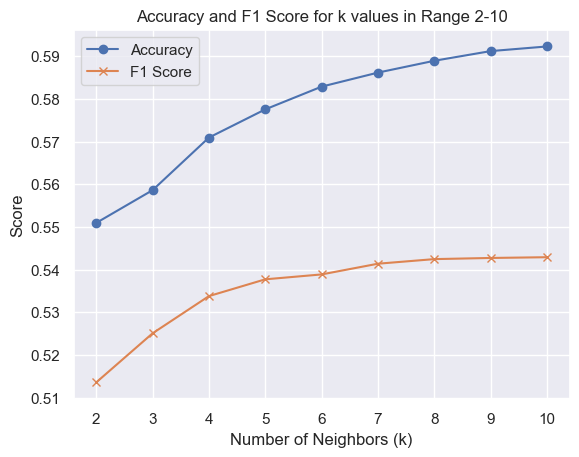

Best k in range 2-10: 10
Best Accuracy in range 2-10: 0.5922684568622655
F1 Score for best k (10) in range 2-10: 0.5428947268410625
Evaluating k values in range: 11-20


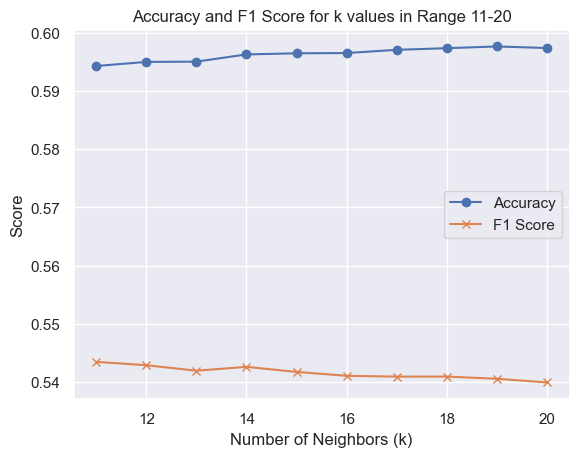

Best k in range 11-20: 19
Best Accuracy in range 11-20: 0.5976408555975321
F1 Score for best k (19) in range 11-20: 0.5405614654903294
Evaluating k values in range: 21-30


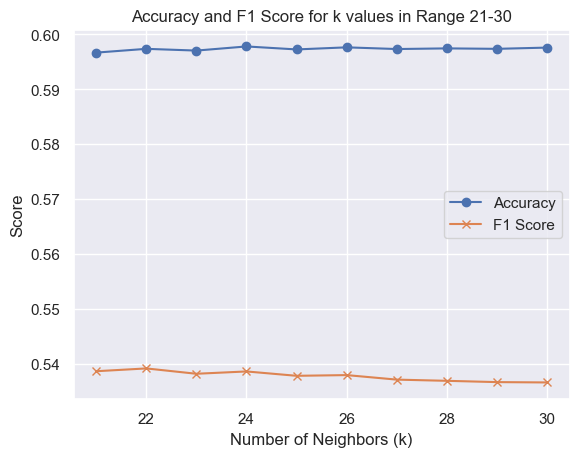

Best k in range 21-30: 24
Best Accuracy in range 21-30: 0.5978220494840504
F1 Score for best k (24) in range 21-30: 0.5386272334781192


In [ ]:
#KNN with PCA, data sampling Annoy optimization

train_data_knn = train_data.copy()
test_data_knn = test_data.copy()

# Define the independant variables (as data) and the target variable
data_knn = train_data_knn.drop(["Claim Injury Type"], axis=1)
target_knn = train_data_knn["Claim Injury Type"]

# Split data to X_train, X_test, y_train and y_test
X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(data_knn, 
                                                  target_knn, 
                                                  test_size = 0.2, 
                                                  random_state=5, 
                                                  stratify = target_knn)


# Sample and reduce dimensionality of the data
sample_size = 400000
X_train_knn_sample, _, y_train_knn_sample, _ = train_test_split(X_train_knn, y_train_knn, train_size=sample_size, random_state=42)
# Determine the number of PC's based on available features or samples
n_components = min(15, X_train_knn_sample.shape[1])
pca = PCA(n_components=n_components)
X_train_knn_reduced = pca.fit_transform(X_train_knn_sample)
X_val_knn_reduced = pca.transform(X_val_knn)

# Build Annoy index with reduced data
index = AnnoyIndex(X_train_knn_reduced.shape[1], 'euclidean')
for i, vector in enumerate(X_train_knn_reduced):
    index.add_item(i, vector)
index.build(10)  # Number of trees in Annoy; higher means better accuracy but slower build


# Convert y_train_knn_sample to a NumPy array for positional indexing
y_train_knn_sample = y_train_knn_sample.to_numpy()

# Function to get predictions using Annoy 
'''
Retrieves the indices of the k nearest neighbors for the vector x in X_val. These are approximate neighbors based on the trees built by Annoy.
'''

def get_approximate_knn_predictions(X_val, index, y_train, k):
    predictions = []
    for x in X_val:
        nearest_indices = index.get_nns_by_vector(x, k)
        nearest_labels = [y_train[idx] for idx in nearest_indices]
        predictions.append(max(set(nearest_labels), key=nearest_labels.count))
    return predictions

# Evaluate each range of k values
k_ranges = {
    "2-10": range(2, 11),
    "11-20": range(11, 21),
    "21-30": range(21, 31)
    # "100-110": range(100, 111)
}

best_k_values = {}
best_accuracy_scores = {}
best_f1_scores = {}
best_predictions = {}

for label, k_range in k_ranges.items():
    accuracy_scores = []
    f1_scores = []
    high_accuracy = 0
    best_k = 0
    best_preds = None
    best_f1 = 0  # Track F1 score for the best k based on accuracy

    print(f"Evaluating k values in range: {label}")
    
    for k in k_range:
        # Get approximate KNN predictions
        predictions = get_approximate_knn_predictions(X_val_knn_reduced, index, y_train_knn_sample, k)
        
        # Calculate accuracy and F1 score
        accuracy = accuracy_score(y_val_knn, predictions)
        f1 = f1_score(y_val_knn, predictions, average='weighted')
        
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)

        # Update best k if this model has a higher accuracy
        if accuracy > high_accuracy:
            high_accuracy = accuracy
            best_k = k
            best_preds = predictions
            best_f1 = f1  

    # Store results for this range
    best_k_values[label] = best_k
    best_accuracy_scores[label] = high_accuracy
    best_f1_scores[label] = best_f1
    best_predictions[label] = best_preds

    # Plot Accuracy and F1 Score for the current k range
    plt.figure()
    plt.plot(list(k_range), accuracy_scores, marker='o', label='Accuracy')
    plt.plot(list(k_range), f1_scores, marker='x', label='F1 Score')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.title(f'Accuracy and F1 Score for k values in Range {label}')
    plt.legend()
    plt.show()

    # Output the best result for the range
    print(f"Best k in range {label}: {best_k}")
    print(f"Best Accuracy in range {label}: {high_accuracy}")
    print(f"F1 Score for best k ({best_k}) in range {label}: {best_f1}")



# We saw that with k over 21, we are not gaining accuracy or f1 score anymore. Let's now try more interesting k-values under 21 and also see the training data accuracy to see if we are overfitting. 

# We found that training and evaluation accuracy are getting closer to each other without losing val accuracy with under k<20. Let's try also k values over 20 and see if we can reduce overfitting without losing too much f1 score and validation accuracy.

Evaluating k values in range: 2-10


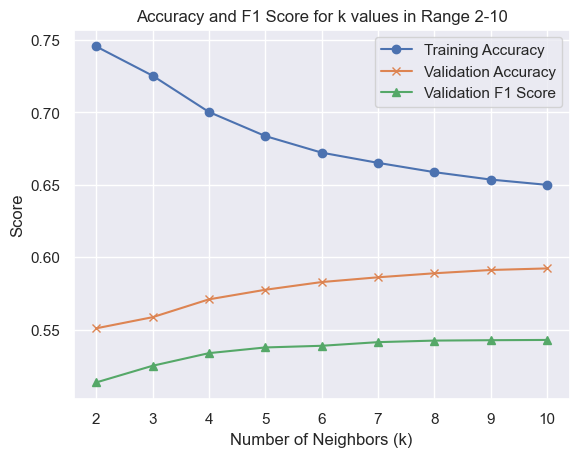

Best k in range 2-10: 10
Best Validation Accuracy in range 2-10: 0.5922684568622655
F1 Score for best k (10) in range 2-10: 0.5428947268410625
Training Accuracy for best k (10) in range 2-10: 0.649945
Evaluating k values in range: 11-20


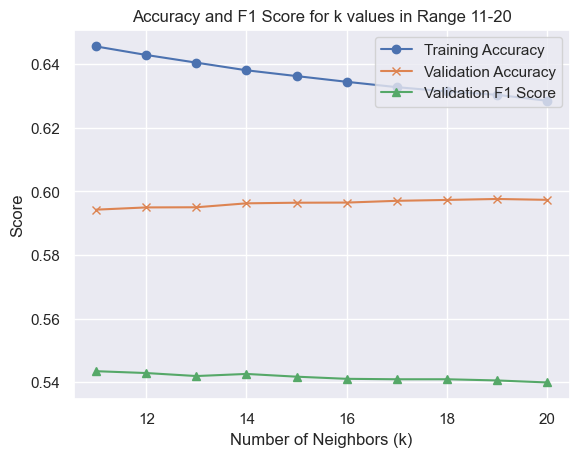

Best k in range 11-20: 19
Best Validation Accuracy in range 11-20: 0.5976408555975321
F1 Score for best k (19) in range 11-20: 0.5405614654903294
Training Accuracy for best k (19) in range 11-20: 0.6304175
Evaluating k values in range: 21-40


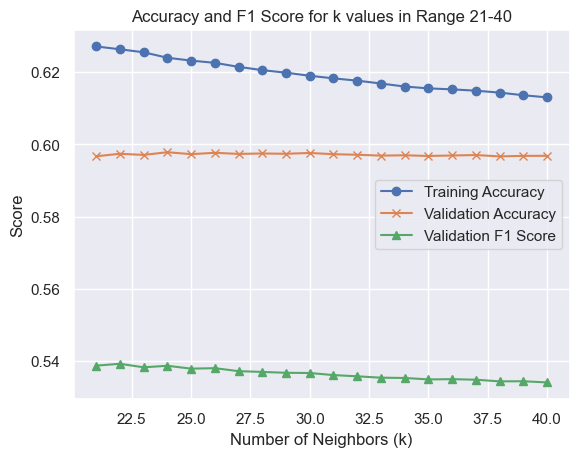

Best k in range 21-40: 24
Best Validation Accuracy in range 21-40: 0.5978220494840504
F1 Score for best k (24) in range 21-40: 0.5386272334781192
Training Accuracy for best k (24) in range 21-40: 0.6240025


In [ ]:
train_data_knn = train_data.copy()
test_data_knn = test_data.copy()

# Define the independant variables (as data) and the target variable
data_knn = train_data_knn.drop(["Claim Injury Type"], axis=1)
target_knn = train_data_knn["Claim Injury Type"]

# Split data to X_train, X_test, y_train and y_test

X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(data_knn, 
                                                  target_knn, 
                                                  test_size = 0.2, 
                                                  random_state=5, 
                                                  stratify = target_knn)

# Sample and reduce dimensionality of the data
sample_size = 400000
X_train_knn_sample, _, y_train_knn_sample, _ = train_test_split(X_train_knn, y_train_knn, train_size=sample_size, random_state=42)
pca = PCA(n_components=min(15, X_train_knn_sample.shape[1]))  # Adjusting PCA components as needed
X_train_knn_reduced = pca.fit_transform(X_train_knn_sample)
X_val_knn_reduced = pca.transform(X_val_knn)

# Convert y_train_knn_sample to a NumPy array for reliable indexing
y_train_knn_sample = y_train_knn_sample.to_numpy()

#  Build Annoy index with reduced data
index = AnnoyIndex(X_train_knn_reduced.shape[1], 'euclidean')
for i, vector in enumerate(X_train_knn_reduced):
    index.add_item(i, vector)
index.build(10)  

# Function to get predictions using Annoy
def get_approximate_knn_predictions(X_val, index, y_train, k):
    predictions = []
    for x in X_val:
        nearest_indices = index.get_nns_by_vector(x, k)
        nearest_labels = [y_train[idx] for idx in nearest_indices]
        predictions.append(max(set(nearest_labels), key=nearest_labels.count))
    return predictions

# Evaluate each range of k values

k_ranges = {
    "2-10": range(2, 11),
    "11-20": range(11, 21),
    "21-40": range(21, 41),
}

best_k_values = {}
best_accuracy_scores = {}
best_f1_scores = {}
best_predictions = {}

for label, k_range in k_ranges.items():
    accuracy_scores_train = []
    accuracy_scores_val = []
    f1_scores = []
    high_accuracy = 0
    best_k = 0
    best_preds = None
    best_f1 = 0  # Track F1 score for the best k based on validation accuracy

    print(f"Evaluating k values in range: {label}")
    
    for k in k_range:
        # Get predictions and accuracy for the validation data
        predictions_val = get_approximate_knn_predictions(X_val_knn_reduced, index, y_train_knn_sample, k)
        accuracy_val = accuracy_score(y_val_knn, predictions_val)
        f1_val = f1_score(y_val_knn, predictions_val, average='weighted')

        # Get predictions and accuracy for the training data
        predictions_train = get_approximate_knn_predictions(X_train_knn_reduced, index, y_train_knn_sample, k)
        accuracy_train = accuracy_score(y_train_knn_sample, predictions_train)

        # Store training and validation accuracy and F1 score
        accuracy_scores_train.append(accuracy_train)
        accuracy_scores_val.append(accuracy_val)
        f1_scores.append(f1_val)

        # Update best k if this model has a higher validation accuracy
        if accuracy_val > high_accuracy:
            high_accuracy = accuracy_val
            best_k = k
            best_preds = predictions_val
            best_f1 = f1_val  # Store the F1 score for the best accuracy on validation data

    # Store results for this range
    best_k_values[label] = best_k
    best_accuracy_scores[label] = high_accuracy
    best_f1_scores[label] = best_f1
    best_predictions[label] = best_preds

    # Plot Accuracy (Train and Validation) and F1 Score for the current k range
    plt.figure()
    plt.plot(list(k_range), accuracy_scores_train, marker='o', label='Training Accuracy')
    plt.plot(list(k_range), accuracy_scores_val, marker='x', label='Validation Accuracy')
    plt.plot(list(k_range), f1_scores, marker='^', label='Validation F1 Score')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.title(f'Accuracy and F1 Score for k values in Range {label}')
    plt.legend()
    plt.show()

    # Output the best result for the range
    print(f"Best k in range {label}: {best_k}")
    print(f"Best Validation Accuracy in range {label}: {high_accuracy}")
    print(f"F1 Score for best k ({best_k}) in range {label}: {best_f1}")
    print(f"Training Accuracy for best k ({best_k}) in range {label}: {accuracy_scores_train[k_range.index(best_k)]}")



## Best K taking accuracy in both val and test set in account seems to be k=35. Even though training accuracy is dropping, the overfitting is reduced with higher k. Validation performance is staying quite consistent with higher k and f1 is not dropping significantly. Later in optimization we might want to oversample training data that has the minority class value of the traget variable. Now our model is probably not good in classification of those minority target variable class rows.

## Even though best validation accuracy is found with k=24, I prefer to have better generalizing model (less overfitting) than only 0.1% better validation accuracy. Higher k than 35 is not chosen due to efficiency reasons at this point. Maybe later with more time in our hands we could go for higher k.

## Even with k=35, model is slightly overfitting still.

In [ ]:
# Transform the test data with PCA
X_test_knn_reduced = pca.transform(test_data_knn) 

# Make predictions on the transformed test data using the best k value
best_k = 35 # Replace with the range key that had the best k (35)
test_predictions = get_approximate_knn_predictions(X_test_knn_reduced, index, y_train_knn_sample, best_k)


In [ ]:

test_predictions = [int(pred) for pred in test_predictions]

print(test_predictions)
print(claim_injury_type_mapping)

# Format the predictions according to the required label format

# # Convert numerical predictions to the required string format using label mapping
formatted_predictions = [claim_injury_type_mapping[pred] for pred in test_predictions]

formatted_predictions

# # Create the submission DataFrame
submission = pd.DataFrame({
    "Claim Identifier": test_data.index,
    "Claim Injury Type": formatted_predictions
})

submission.head()
# # Save to CSV in the required format
submission.to_csv("model1.csv", index=False)

print("Submission file created: model1.csv")

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 5, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 1, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 

## Experiment with standardization for also categorial predictor variables (MODEL FOR BEST KAGGLE RESULT)

Evaluating k values in range: 30-40


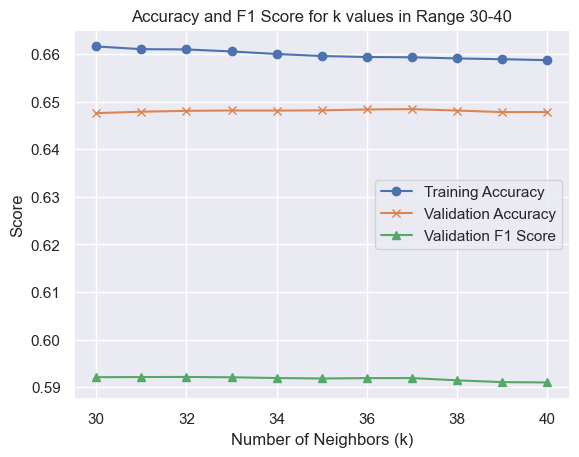

Best k in range 30-40: 37
Best Validation Accuracy in range 30-40: 0.648420442294277
F1 Score for best k (37) in range 30-40: 0.5919415466564895
Training Accuracy for best k (37) in range 30-40: 0.659315


In [ ]:
train_data_knn = train_data_non_standardized.copy()
test_data_knn = test_data_non_standardized.copy()

# Get all columns from the train data which are not the target variable
predictor_cols = train_data_knn.columns[train_data_knn.columns != "Claim Injury Type"]

# Initialize the StandardScaler
scaler = StandardScaler()
scaler.fit(train_data_knn[predictor_cols])

# Scale the columns in both train and test data
train_data_knn[predictor_cols] = scaler.transform(train_data_knn[predictor_cols])
test_data_knn[predictor_cols] = scaler.transform(test_data_knn[predictor_cols])


# Define the independant variables (as data) and the target variable
data_knn = train_data_knn.drop(["Claim Injury Type"], axis=1)
target_knn = train_data_knn["Claim Injury Type"]

# Split data to X_train, X_test, y_train and y_test
X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(data_knn, 
                                                  target_knn, 
                                                  test_size = 0.2, 
                                                  random_state=5, 
                                                  stratify = target_knn)

# Sample and reduce dimensionality of the data
sample_size = 400000
X_train_knn_sample, _, y_train_knn_sample, _ = train_test_split(X_train_knn, y_train_knn, train_size=sample_size, random_state=42)
pca = PCA(n_components=min(15, X_train_knn_sample.shape[1]))  # Adjusting PCA components as needed
X_train_knn_reduced = pca.fit_transform(X_train_knn_sample)
X_val_knn_reduced = pca.transform(X_val_knn)

# Convert y_train_knn_sample to a NumPy array for reliable indexing
y_train_knn_sample = y_train_knn_sample.to_numpy()

#  Build Annoy index with reduced data
index = AnnoyIndex(X_train_knn_reduced.shape[1], 'euclidean')
for i, vector in enumerate(X_train_knn_reduced):
    index.add_item(i, vector)
index.build(10)  

# Function to get predictions using Annoy
def get_approximate_knn_predictions(X_val, index, y_train, k):
    predictions = []
    for x in X_val:
        nearest_indices = index.get_nns_by_vector(x, k)
        nearest_labels = [y_train[idx] for idx in nearest_indices]
        predictions.append(max(set(nearest_labels), key=nearest_labels.count))
    return predictions

# Evaluate each range of k values
k_ranges = {
    "30-40": range(30, 41),
}

best_k_values = {}
best_accuracy_scores = {}
best_f1_scores = {}
best_predictions = {}

for label, k_range in k_ranges.items():
    accuracy_scores_train = []
    accuracy_scores_val = []
    f1_scores = []
    high_accuracy = 0
    best_k = 0
    best_preds = None
    best_f1 = 0  # Track F1 score for the best k based on validation accuracy

    print(f"Evaluating k values in range: {label}")
    
    for k in k_range:
        # Get predictions and accuracy for the validation data
        predictions_val = get_approximate_knn_predictions(X_val_knn_reduced, index, y_train_knn_sample, k)
        accuracy_val = accuracy_score(y_val_knn, predictions_val)
        f1_val = f1_score(y_val_knn, predictions_val, average='weighted')

        # Get predictions and accuracy for the training data
        predictions_train = get_approximate_knn_predictions(X_train_knn_reduced, index, y_train_knn_sample, k)
        accuracy_train = accuracy_score(y_train_knn_sample, predictions_train)

        # Store training and validation accuracy and F1 score
        accuracy_scores_train.append(accuracy_train)
        accuracy_scores_val.append(accuracy_val)
        f1_scores.append(f1_val)

        # Update best k if this model has a higher validation accuracy
        if accuracy_val > high_accuracy:
            high_accuracy = accuracy_val
            best_k = k
            best_preds = predictions_val
            best_f1 = f1_val  # Store the F1 score for the best accuracy on validation data

    # Store results for this range
    best_k_values[label] = best_k
    best_accuracy_scores[label] = high_accuracy
    best_f1_scores[label] = best_f1
    best_predictions[label] = best_preds

    # Plot Accuracy (Train and Validation) and F1 Score for the current k range
    plt.figure()
    plt.plot(list(k_range), accuracy_scores_train, marker='o', label='Training Accuracy')
    plt.plot(list(k_range), accuracy_scores_val, marker='x', label='Validation Accuracy')
    plt.plot(list(k_range), f1_scores, marker='^', label='Validation F1 Score')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.title(f'Accuracy and F1 Score for k values in Range {label}')
    plt.legend()
    plt.show()

    # Output the best result for the range
    print(f"Best k in range {label}: {best_k}")
    print(f"Best Validation Accuracy in range {label}: {high_accuracy}")
    print(f"F1 Score for best k ({best_k}) in range {label}: {best_f1}")
    print(f"Training Accuracy for best k ({best_k}) in range {label}: {accuracy_scores_train[k_range.index(best_k)]}")


## Best k seems to be 37 in this case from range 30 to 40. 


In [ ]:
# Transform the test data with PCA
X_test_knn_reduced = pca.transform(test_data_knn) 

# Make predictions on the transformed test data using the best k value
best_k = 37 # Replace with the range key that had the best k (37)
test_predictions = get_approximate_knn_predictions(X_test_knn_reduced, index, y_train_knn_sample, best_k)

test_predictions = [int(pred) for pred in test_predictions]

# Format the predictions according to the required label format

# # Convert numerical predictions to the required string format using label mapping
formatted_predictions = [claim_injury_type_mapping[pred] for pred in test_predictions]

formatted_predictions

# # Create the submission DataFrame
submission = pd.DataFrame({
    "Claim Identifier": test_data.index,
    "Claim Injury Type": formatted_predictions
})

submission.head()
# # Save to CSV in the required format
submission.to_csv("model4.csv", index=False)

print("Submission file created: model4.csv")

Submission file created: model4.csv


### Optimizations and results
* **Increase training data points (from sample of 50 000 to all of the data)**
    * With 50 000 samples of training data
        * **We got f1 score of 0.23926 in Kaggle**
        * Best k in range 10-30 was k=20
        * Best Validation Accuracy for k=20, 0.56
        * F1 Score (for validation data) for k=20: 0.49
        * Training data Accuracy for k = 20: 0.59382
    * Increasing the sample size of training data for training to be 400 000 (sample of 400 000 to all of the data)
        * **We got f1 score of 0.26029 in Kaggle**
        * Best k in range 10-40 was k=35
        * Best Validation Accuracy for k=35, approx. 0.595
        * F1 Score (for validation data) for k=35: 0.5375
        * Training data Accuracy for k = 35: 0.6175

* **Scale categorial features as well**
    * Let's use standardization to also standardize the categorial values instead of only metric columns.
        * We will experience this with size of training data as 400 000 (sample of 400 000 to all of the data)
        * Let's try 10 different k values around the k=35 (so from k=30 to k=40)
        * Results:
            * **We got f1 score of 0.27128 in Kaggle**
            * Best k in range 30-40: 37
            * Best Validation Accuracy k=37: 0.648
            * F1 Score for k=37: 0.591
            * Training Accuracy for k=37 in range 30-40: 0.659315

### Future optimizations for project part 2
* **Let go more features**
    * Get rid of highly correlating features with each other (WCIO... features)
        * ...
    * Try optimal features from LogisticRegression's RFE.
        * ...
    * Implement KNNClassifier with RFE
* Oversample minority target variable values
    *...
* Different PCA values or without PCA
    * ...
* Weighting closer neighbors more
* KFold 

## Testing of almost random Classifier
* Just for fun of it, random classifier was used. Guessing was weighted to favor most usual value in target variable in training data. Only other value we allowed the model to guess was the second most usual value in target variable in training data.

## Result: Bad as expected
* In kaggle, f1 score of 0.13 was achieved

In [ ]:
# NOTE: Commented out since this is not needed for achieving our final results

# Find two most usual target values
# print(train_data['Claim Injury Type'].value_counts())

# Check label mapping
# print(claim_injury_type_mapping)

# Take the Claim Identifier numbers from model1.csv
# model1 = pd.read_csv('model1.csv')
# print(model1['Claim Identifier'])

# # Make a new submission file (model2.csv) with the two most usual target values randomly assigned for every Claim Identifier in model1.csv wtih more ephasis for the most usual value


# # Create a list of the two most usual target values
# most_usual_values = [0, 1]

# # Generate random guesses with weighted probabilities

# # Define the probabilities for each value
# probabilities = [0.8, 0.2]


# print(label_mapping)

# # Generate random guesses
# random_guesses = np.random.choice(most_usual_values, size=len(model1), p=probabilities)

# # Create a new DataFrame for the submission
# submission_model2 = pd.DataFrame({
#     'Claim Identifier': model1['Claim Identifier'],
#     'Claim Injury Type': random_guesses
# })

# # Map the values in submission_model2 'Claim Injury Type' to match the original target values in label_mapping
# submission_model2['Claim Injury Type'] = submission_model2['Claim Injury Type'].map(label_mapping)
# print(submission_model2)


# # Save the new submission file
# submission_model2.to_csv('model3.csv', index=False)



# Things to  consider when optimizing models in deliverable 2

## These columns show low correlation with the target variable. Consider training models with and without them to see if they affect accuracy, precision and f1-score
* District Name
* Gender
* Carrier type 
* Number of Dependents

## These columns showed high correlation between each other. Consider dropping one or two of them
* WCIO Cause of Injury Code, WCIO Nature of Injury Code and WCIO Part Of Body Code had high correlations between each other AND nice correlations between target variable.
    * We can consider droppig one or two of these to avoid redundancy

## Scaling
* Try to also change z-score scaling to min-max scaling and see if it affects the accuracy of the model
* Experience with scaling only numerical values and both numerical and categorial values

## Outliers
* See if thresholding the days until injury reported -feature's values to even lower max-value affects the model accuracy 


## Keep in mind, the unbalance of the target variable categories. If model performance is not good, try oversampling the rows with minority Claim Injury Type values or try SMOTE
Claim Injury Type
- 2. NON-COMP        0.510175
- 4. TEMPORARY       0.257070
- 3. MED ONLY        0.121362
- 5. PPD SCH LOSS    0.084481
- 1. CANCELLED       0.018900
- 6. PPD NSL         0.007112
- 8. DEATH           0.000775
- 7. PTD             0.000126

# OPTIMIZATIONS ON KNNCLASSIFIER

# DEEP NEURAL NETWORK MODEL TRAINING AND OPTIMIZATION

In [ ]:
train_data_NN = train_data_non_standardized.copy()
test_data_NN = test_data_non_standardized.copy()

# Prepare the data
predictor_cols = train_data_NN.columns[train_data_NN.columns != "Claim Injury Type"]
X = train_data_NN[predictor_cols]
y = train_data_NN["Claim Injury Type"]


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the total number of features in the dataset
num_features = X.shape[1]

# Lists to store the results for plotting
accuracy_scores_train = []
accuracy_scores_val = []
f1_scores_val = []
num_feature_list = list(range(1, num_features + 1))

# Use LogisticRegression as the base estimator for RFE
base_estimator = LogisticRegression(max_iter=1000)  

# Loop over feature numbers from 1 to the total number of features
for n_features in num_feature_list:
    # Use RFE to select n_features
    rfe = RFE(estimator=base_estimator, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    selected_features = rfe.support_

    # Select the features from training and validation sets
    X_train_rfe = X_train[:, selected_features]
    X_val_rfe = X_val[:, selected_features]
    
    # Build the MLPClassifier with a deep structure and small hidden layers
    mlp = MLPClassifier(
        hidden_layer_sizes=(32, 16, 16, 8, 8, 4),  # Deep structure with gradually decreasing sizes
        activation='relu',
        solver='adam',
        max_iter=50  # Increase this if convergence warnings appear
    )

    # Train the MLP model
    mlp.fit(X_train_rfe, y_train)

    # Evaluate on training data
    train_preds = mlp.predict(X_train_rfe)
    accuracy_train = accuracy_score(y_train, train_preds)

    # Evaluate on validation data
    val_preds = mlp.predict(X_val_rfe)
    accuracy_val = accuracy_score(y_val, val_preds)
    f1_val = f1_score(y_val, val_preds, average='weighted')

    # Store results
    accuracy_scores_train.append(accuracy_train)
    accuracy_scores_val.append(accuracy_val)
    f1_scores_val.append(f1_val)

    # Print results for each feature set
    print(f"Number of features: {n_features}")
    print(f"Training Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Validation F1 Score: {f1_val}")
    print("-" * 50)

# Plotting accuracy and F1 scores for different feature counts
plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(num_feature_list, accuracy_scores_train, label='Training Accuracy', marker='o')
plt.plot(num_feature_list, accuracy_scores_val, label='Validation Accuracy', marker='x')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Features')
plt.legend()

# Plot Validation F1 Score
plt.subplot(1, 2, 2)
plt.plot(num_feature_list, f1_scores_val, label='Validation F1 Score', marker='^')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('Validation F1 Score vs. Number of Features')
plt.legend()

plt.tight_layout()
plt.show()



Number of features: 1
Training Accuracy: 0.5114242745449769
Validation Accuracy: 0.5114288043921398
Validation F1 Score: 0.3461088225947454
--------------------------------------------------


/Users/onnimansikkamaki/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Number of features: 2
Training Accuracy: 0.5281937687422427
Validation Accuracy: 0.5277000154014804
Validation F1 Score: 0.3997327904796809
--------------------------------------------------
